<h1>Jupyter notebook for plotting all figures and supplementary figures</h1>

In [19]:
from __future__ import print_function
import sys
import pandas as pd
import math
import os
import argparse
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Figure 1</h2>

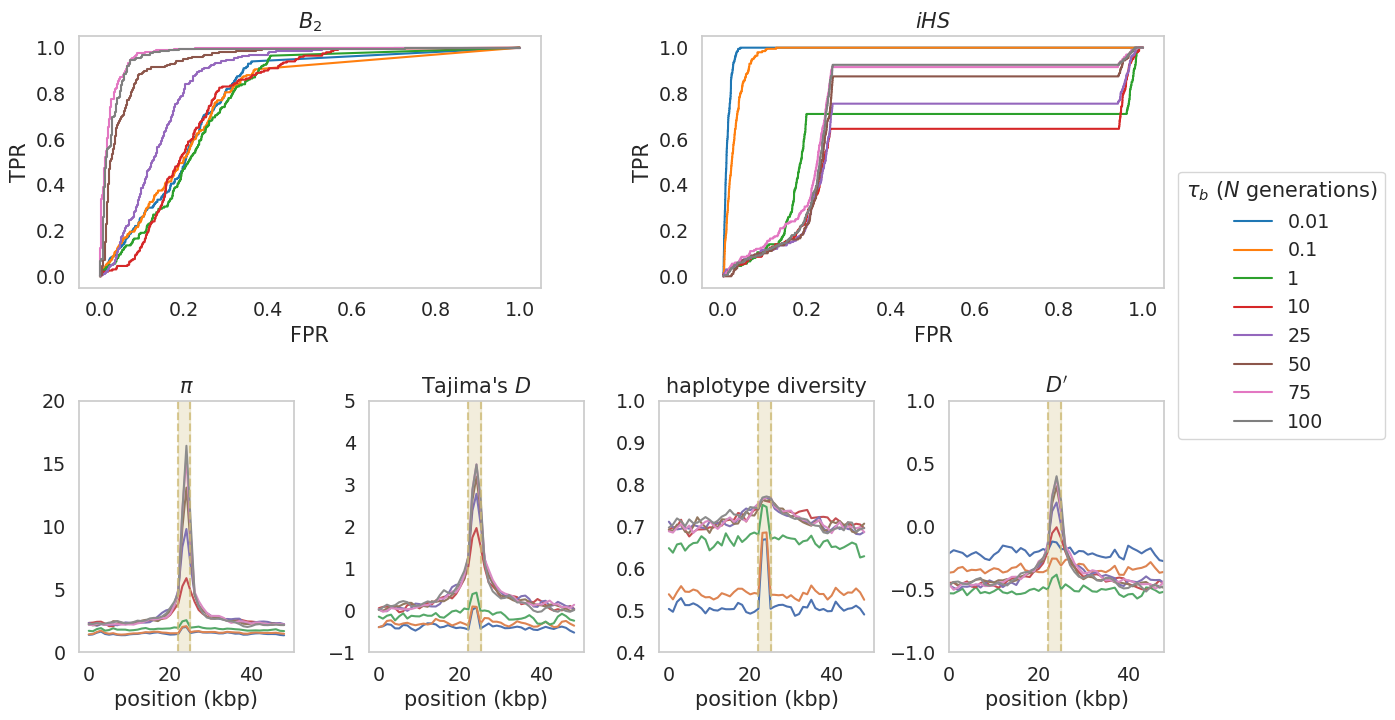

In [40]:
plt.figure(figsize=(14, 8))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,4,5)
ax4 = plt.subplot(2,4,6)
ax5 = plt.subplot(2,4,7)
ax6 = plt.subplot(2,4,8)
ax_list = [ax1, ax2, ax3, ax4, ax5, ax6]
N_list = [0.01, 0.1, 1, 10, 25, 50, 75, 100]

maxRep = 201
winSize = 100
chr_len=50000
cols = ['tab:blue',
'tab:orange',
'tab:green',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan']

demog='stationary'
rr='fixed'
mu='fixed'
bp_pos = 24999

for c,N in enumerate(N_list):
    rdf = pd.DataFrame()
    for rep in range(1, maxRep):
        try:
            df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/BM_inputFiles/results/stationary/" + 
                             "rr_fixed_mu_fixed/demog_only/100/hSap_rep" + str(rep) + "_" + str(N) + "N.B2", sep='\t', header=0)

            df['bin'] = pd.cut(df.physPos, [x for x in range(1, 50000+winSize, winSize)],
                              labels=[x for x in range(1, 50000, winSize)])
            df['bp'] = np.where(df.physPos == bp_pos, 1, 0)
            df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
            df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
            df = pd.merge(df1,df2, left_index=True, right_index=True)
            df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
            df['bp'] = np.where(df.bp > 1, 1, df.bp)
            rdf = pd.concat([rdf, df])
        except Exception:
            pass

    y = rdf.bp
    scores = rdf.CLR
    fpr, tpr, thresholds = metrics.roc_curve(y, scores)
    tdf = pd.DataFrame([fpr, tpr]).T
    #print("Empirical p<=0.05: " + str(tdf[tdf[0]<=0.05][1].max()))
    ax1.plot(fpr, tpr, label=N, c = cols[c])
ax1.set_title(r'$B_2$')
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')

#plt.subplot(1,2,2)
for c,N in enumerate(N_list):
    rdf = pd.DataFrame()
    for rep in range(1, maxRep):
        df = pd.read_csv(r'/home/vivak/balancing_selection/scripts/ihs/output/stationary/rr_fixed_mu_fixed/demog_only/100/hSap_rep' + str(rep) + '_' + str(N) + 'N.ihs.out',
                        names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')
    
        df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                          labels=[x for x in range(1, chr_len, winSize)])
        df['bp'] = np.where(df.pos == bp_pos, 1, 0)
        df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
        df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
        df = pd.merge(df1,df2, left_index=True, right_index=True)
        df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
        df['bp'] = np.where(df.bp > 1, 1, df.bp)
        rdf = pd.concat([rdf, df])
    
    y = rdf.bp
    scores = rdf.ihs
    fpr, tpr, thresholds = metrics.roc_curve(y, scores)
    tdf = pd.DataFrame([fpr, tpr]).T
    #print(str(tdf[tdf[0]<=0.05][1].max()))
    ax2.plot(fpr, tpr, label=str(N) , c=cols[c])
ax2.set_title('$iHS$')
ax2.legend(bbox_to_anchor=(1.5, 0.5), title=r'$\tau_b$' + ' ($N$ generations)')
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')




demog='stationary'
rr='fixed'
mu='fixed'
wlim = 48
####PLOT SUMMARY STATS FOR A SINGLE SCENARIO####
lst = [0,3,6,9]
ylabs = [r'$\pi$', r"Tajima's $D$",  r"haplotype diversity", r"$D'$"]
ylims = [[0, 20], [-1,5], [0.4, 1], [-1, 1], [0, 1]]
df_list = []
for N in N_list:
    df1 = pd.DataFrame()
    for rep in range(1, 201):
        try:
            tdf = pd.read_csv(r"/home/vivak/balancing_selection/summary_stats/"+demog+
                              "/rr_"+rr+"_mu_"+mu+ "/demog_only/100/hSap_rep" + 
                              str(rep) + '_' + str(N) + 'N.stats', sep='\t',header=0)
            df1 = pd.concat([df1, tdf])
            df1['divergence'] = df1['divergence'] / N


        except Exception:
            pass

    l = [tdf.window]
    for stat in ('thetapi', 'tajimasd', 'meanrsq', 'numpoly', 'numsingletons', 'nhaps', 'divergence', 'hapdiv', 'meanDprime'):
        l.append(df1.groupby('window')[stat].mean())

    df1 = pd.DataFrame(l).T
    df1 = df1[df1.window<=wlim] 
    df_list.append(df1)
    

for a, stat in enumerate(['thetapi', 'tajimasd', 'hapdiv', 'meanDprime']):
    for b, df in enumerate(df_list):
        ax_list[a+2].plot(df[stat], label= str(N_list[b]) + r"$N$")   
    ax_list[a+2].axvline(22, color='y', linestyle='--', alpha=0.75)
    ax_list[a+2].axvline(25, color='y', linestyle='--', alpha=0.75)
    ax_list[a+2].fill_betweenx([-5, 150], [22], [25], alpha=0.25, color='y')
    ax_list[a+2].set_ylim([ylims[a][0], ylims[a][1]])
    ax_list[a+2].set_xlabel('position (kbp)')
    ax_list[a+2].set_title(ylabs[a])

    plt.margins(x=0)

# #Adjust spacing between subplots
plt.subplots_adjust(wspace=0.35, hspace=0.45)
plt.savefig('/home/vivak/balancing_selection/plots/fig1.pdf', format='pdf', dpi=600, bbox_inches='tight')

<h2>Figure 2</h2>

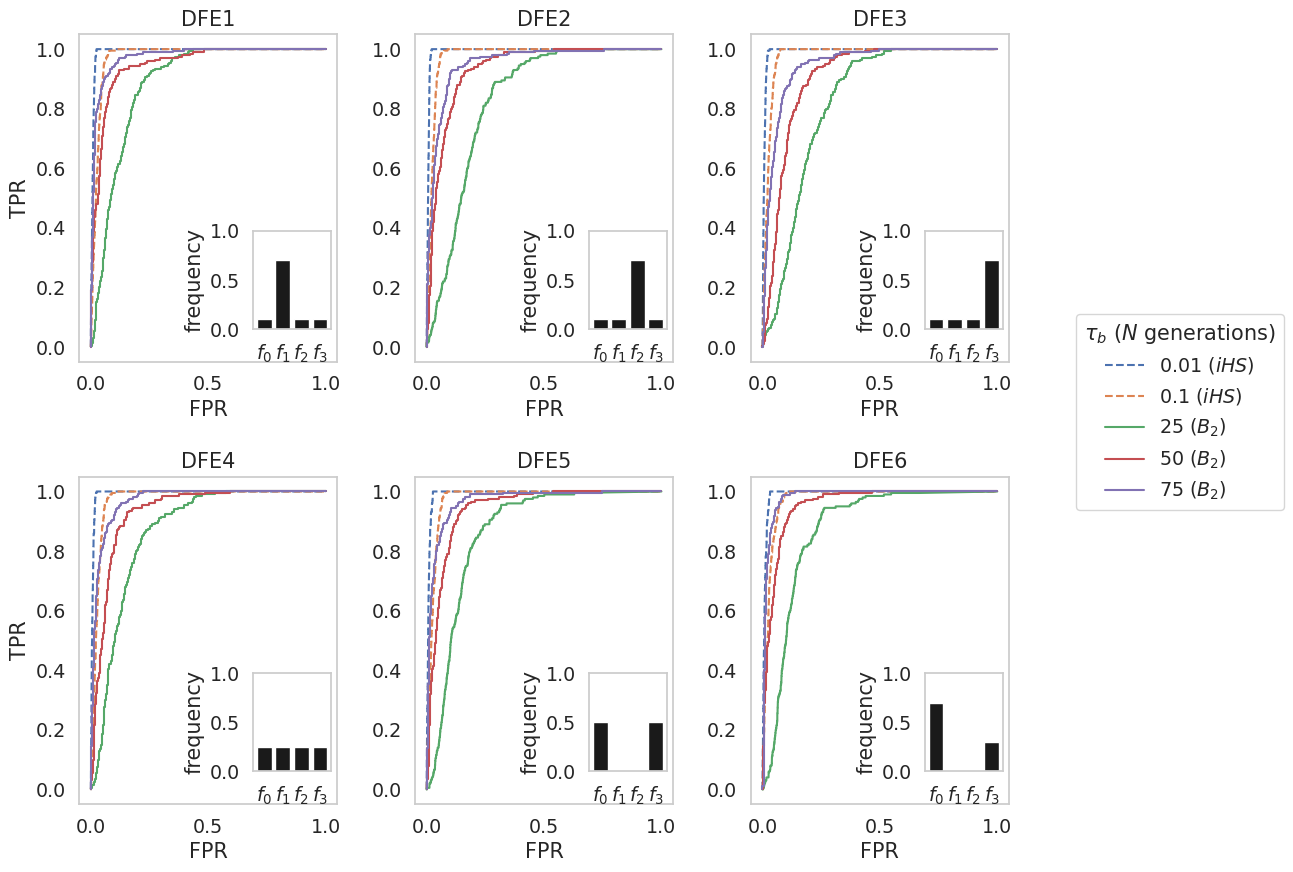

In [161]:
DFE = [[0.1,0.7,0.1,0.1],
      [0.1,0.1,0.7,0.1],
      [0.1,0.1,0.1,0.7],
      [0.25,0.25,0.25,0.25],
      [0.5,0,0,0.5],
      [0.7,0,0,0.3]]
DFE_x = [a for a in range(0,4)]

maxRep = 201
winSize = 100
chr_len = 85005
demog='stationary'
rr='fixed'
mu='fixed'
bp_pos = 40342
for demog in ['stationary']:
    sns.set(rc={'figure.figsize':(12,10),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
    fig, axes = plt.subplots(2,3)
    for d, ax in enumerate(axes.flat):
        for N in [0.01, 0.1, 25, 50, 75]:
            rdf = pd.DataFrame()
            if(N>10):
                for rep in range(1, maxRep):
                    try:
                        df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/BM_inputFiles/results/" + demog +
                                         "/rr_"+rr+"_mu_"+mu+"/demog_DFE/100/hSap_DFE" + str(d+1) + 
                                         "_rep" + str(rep) + "_" + str(N) + "N.B2", 
                                         sep='\t', header=0)

                        df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)],
                                          labels=[x for x in range(1, chr_len, winSize)])
                        df['bp'] = np.where(df.physPos == bp_pos, 1, 0)
                        df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
                        df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
                        df = pd.merge(df1,df2, left_index=True, right_index=True)
                        df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
                        df['bp'] = np.where(df.bp > 1, 1, df.bp)
                        rdf = pd.concat([rdf, df])
                    except Exception:
                        pass
                      
                y = rdf.bp
                scores = rdf.CLR
                fpr, tpr, thresholds = metrics.roc_curve(y, scores)
                tdf = pd.DataFrame([fpr, tpr]).T
                #print(demog + "; DFE" + str(d+1) + "; " + str(N) + "; " + str(tdf[tdf[0]<=0.05][1].max()))
                ax.plot(fpr, tpr, label=str(N) + " " + r"($B_2$)")
                
            else:
                for rep in range(1, maxRep):
                    df = pd.read_csv(r'/home/vivak/balancing_selection/scripts/ihs/output/' + demog +
                                     "/rr_"+rr+"_mu_"+mu+"/demog_DFE/100/hSap_DFE" + str(d+1) + 
                                         "_rep" + str(rep) + "_" + str(N) + "N.ihs.out",
                                    names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')

                    df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                                      labels=[x for x in range(1, chr_len, winSize)])
                    df['bp'] = np.where(df.pos == bp_pos, 1, 0)
                    df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
                    df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
                    df = pd.merge(df1,df2, left_index=True, right_index=True)
                    df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
                    df['bp'] = np.where(df.bp > 1, 1, df.bp)
                    rdf = pd.concat([rdf, df])

                y = rdf.bp
                scores = rdf.ihs
                fpr, tpr, thresholds = metrics.roc_curve(y, scores)
                tdf = pd.DataFrame([fpr, tpr]).T
                #print(str(tdf[tdf[0]<=0.05][1].max()))
                ax.plot(fpr, tpr, label=str(N) + " " + r"($iHS$)", linestyle='--')

                

        left, bottom, width, height = [0.675, 0.1, 0.3, 0.3]
        ax2 = ax.inset_axes([left, bottom, width, height])
        ax2.bar(x=DFE_x, height=DFE[d], color='k')
        if(d==2):
            ax.legend(bbox_to_anchor=(2.1, 0.175), title=r'$\tau_b$' + ' ($N$ generations)')
        ax.set_xlabel('FPR')
        ax.set_title("DFE"+str(d+1))
        if((d==0) | (d==3)):
            ax.set_ylabel('TPR')
        ax2.set_ylabel('frequency')
        ax2.set_xticks(DFE_x) 
        ax2.set_xticklabels([r'$f_0$', r'$f_1$', r'$f_2$', r'$f_3$'])
    
        ax2.set_yticks([0, 0.5, 1])
    
    plt.subplots_adjust(wspace=0.3, hspace=0.35)    
    plt.savefig('/home/vivak/balancing_selection/plots/fig2.tiff', format='tiff', dpi=300, bbox_inches='tight')
    plt.savefig('/home/vivak/balancing_selection/plots/fig2.pdf', format='pdf', dpi=600, bbox_inches='tight')

<h2>Figure 3</h2>

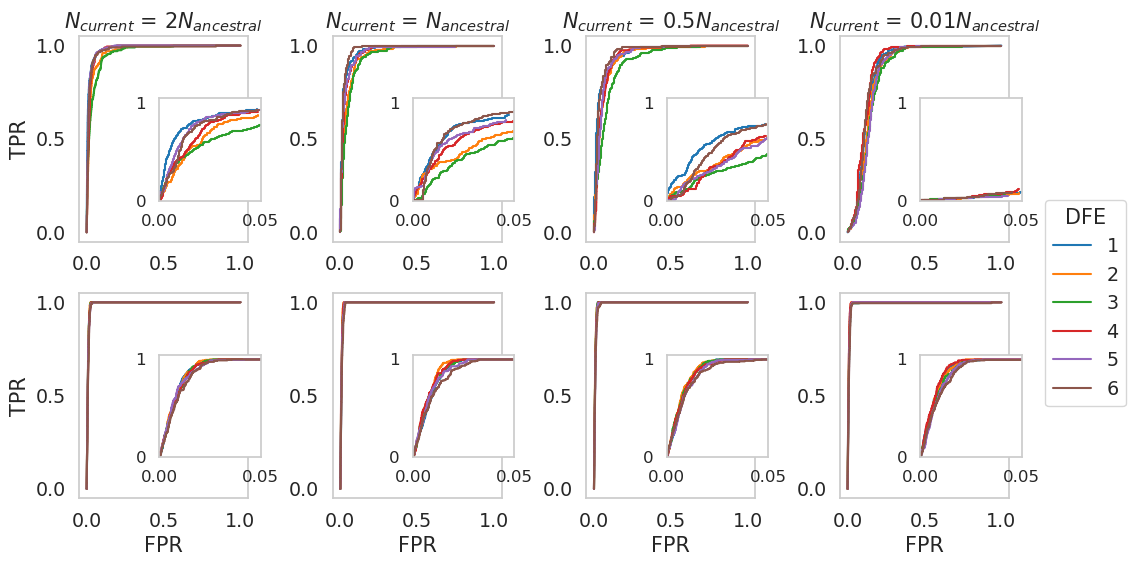

In [158]:
maxRep = 201
winSize = 100
chr_len=85005
cols = ['tab:blue',
'tab:orange',
'tab:green',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan']

titles = [r'$N_{current}$ = 2$N_{ancestral}$', r'$N_{current}$ = $N_{ancestral}$', r'$N_{current}$ = 0.5$N_{ancestral}$', r'$N_{current}$ = 0.01$N_{ancestral}$']
demog='stationary'
rr='fixed'
mu='fixed'
bp_pos = 40342
demogs = [20000, 10000, 5000, 100]
sns.set(rc={'figure.figsize':(12,6),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
fig, axes = plt.subplots(2,4)
for d, ax in enumerate(axes.flat):
    left, bottom, width, height = [0.475, 0.2, 0.6, 0.5]
    ax2 = ax.inset_axes([left, bottom, width, height])
    ax2.xaxis.set_tick_params(labelsize=12)
    ax2.yaxis.set_tick_params(labelsize=12)
    ax2.margins(x=0, y=0)
    if(d<=3):
        for DFE in range(1,7):
            rdf = pd.DataFrame()
            for rep in range(1, maxRep):
                if(demogs[d] != 10000):
                    try:
                        df = pd.read_csv(r"/home/vivak/balancing_selection/demog/B2/" + str(demogs[d]) + '_rr_fixed_mu_fixed_hSap_DFE' + str(DFE) + '_rep' + str(rep) + '_75N.B2',
                                         sep='\t', header=0)
                        df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)], labels=[x for x in range(1, chr_len, winSize)])
                        df['bp'] = np.where(df.physPos == bp_pos, 1, 0)
                        df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
                        df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
                        df = pd.merge(df1,df2, left_index=True, right_index=True)
                        df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
                        df['bp'] = np.where(df.bp > 1, 1, df.bp)
                        rdf = pd.concat([rdf, df])
                    except Exception:
                        pass

                else:
                    try:
                        df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/BM_inputFiles/results/stationary/" + 
                                         "rr_fixed_mu_fixed/demog_DFE/100/hSap_DFE" + str(DFE) + "_rep" + str(rep) + "_75N.B2", sep='\t', header=0)
                        df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)], labels=[x for x in range(1, chr_len, winSize)])
                        df['bp'] = np.where(df.physPos == bp_pos, 1, 0)
                        df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
                        df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
                        df = pd.merge(df1,df2, left_index=True, right_index=True)
                        df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
                        df['bp'] = np.where(df.bp > 1, 1, df.bp)
                        rdf = pd.concat([rdf, df])
                    except Exception:
                        pass


            y = rdf.bp
            scores = rdf.CLR
            fpr, tpr, thresholds = metrics.roc_curve(y, scores)
            tdf = pd.DataFrame([fpr, tpr]).T
            #print("Empirical p<=0.05: " + str(tdf[tdf[0]<=0.05][1].max()))
            ax.plot(fpr, tpr, c = cols[DFE-1])
            roc_df = pd.DataFrame([fpr, tpr]).T
            roc_df.columns = [0,1]
            roc_df = roc_df[(roc_df[0]>=0) & (roc_df[0]<0.05)]
            fpr1 = roc_df[0]
            tpr1 = roc_df[1]
            ax2.plot(fpr1, tpr1, c=cols[DFE-1])
            
            ax.set_title(titles[d])
            if(d==0):
                ax.set_ylabel('TPR')
        ax.set_yticks([0, 0.5, 1])
        ax.set_xticks([0, 0.5, 1])
        ax2.set_ylim([0,1.05])
        ax2.set_xticks([0, 0.05])
        ax2.set_yticks([0, 1])
            

    else:
        for DFE in range(1,7):
            rdf = pd.DataFrame()
            for rep in range(1, maxRep):
                if(demogs[d-4] != 10000):
                    df = pd.read_csv(r'/home/vivak/balancing_selection/demog/iHS/' + str(demogs[d-4]) + '_rr_fixed_mu_fixed_hSap_DFE' + str(DFE) + '_rep' + str(rep) + '_0.01N.ihs.out',
                                    names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')
                else:
                    df = pd.read_csv(r'/home/vivak/balancing_selection/scripts/ihs/output/stationary/rr_fixed_mu_fixed/demog_DFE/100/hSap_DFE' + str(DFE) + '_rep' + str(rep) + '_0.01N.ihs.out',
                        names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')

                df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                                  labels=[x for x in range(1, chr_len, winSize)])
                df['bp'] = np.where(df.pos == bp_pos, 1, 0)
                df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
                df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
                df = pd.merge(df1,df2, left_index=True, right_index=True)
                df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
                df['bp'] = np.where(df.bp > 1, 1, df.bp)
                rdf = pd.concat([rdf, df])

            y = rdf.bp
            scores = rdf.ihs
            fpr, tpr, thresholds = metrics.roc_curve(y, scores)
            tdf = pd.DataFrame([fpr, tpr]).T
            #print(str(tdf[tdf[0]<=0.05][1].max()))
            ax.plot(fpr, tpr, label=DFE, c=cols[DFE-1])
            
            roc_df = pd.DataFrame([fpr, tpr]).T
            roc_df.columns = [0,1]
            roc_df = roc_df[(roc_df[0]>=0) & (roc_df[0]<0.05)]
            fpr1 = roc_df[0]
            tpr1 = roc_df[1]
            ax2.plot(fpr1, tpr1, c=cols[DFE-1])

            
        if(d==7):
            ax.legend(bbox_to_anchor=(1.75, 1.5), title='DFE')
        ax.set_xlabel('FPR')
        ax.set_yticks([0, 0.5, 1])
        ax.set_xticks([0, 0.5, 1])
        if(d==4):
            ax.set_ylabel('TPR')
        ax2.set_ylim([0,1.05])
        ax2.set_xticks([0, 0.05])
        ax2.set_yticks([0, 1])

plt.subplots_adjust(wspace=0.5, hspace=0.25)

plt.savefig('/home/vivak/balancing_selection/plots/fig3.tiff', format='tiff', dpi=300, bbox_inches='tight')
plt.savefig('/home/vivak/balancing_selection/plots/fig3.pdf', format='pdf', dpi=600, bbox_inches='tight')

<h2>Figure 4</h2>

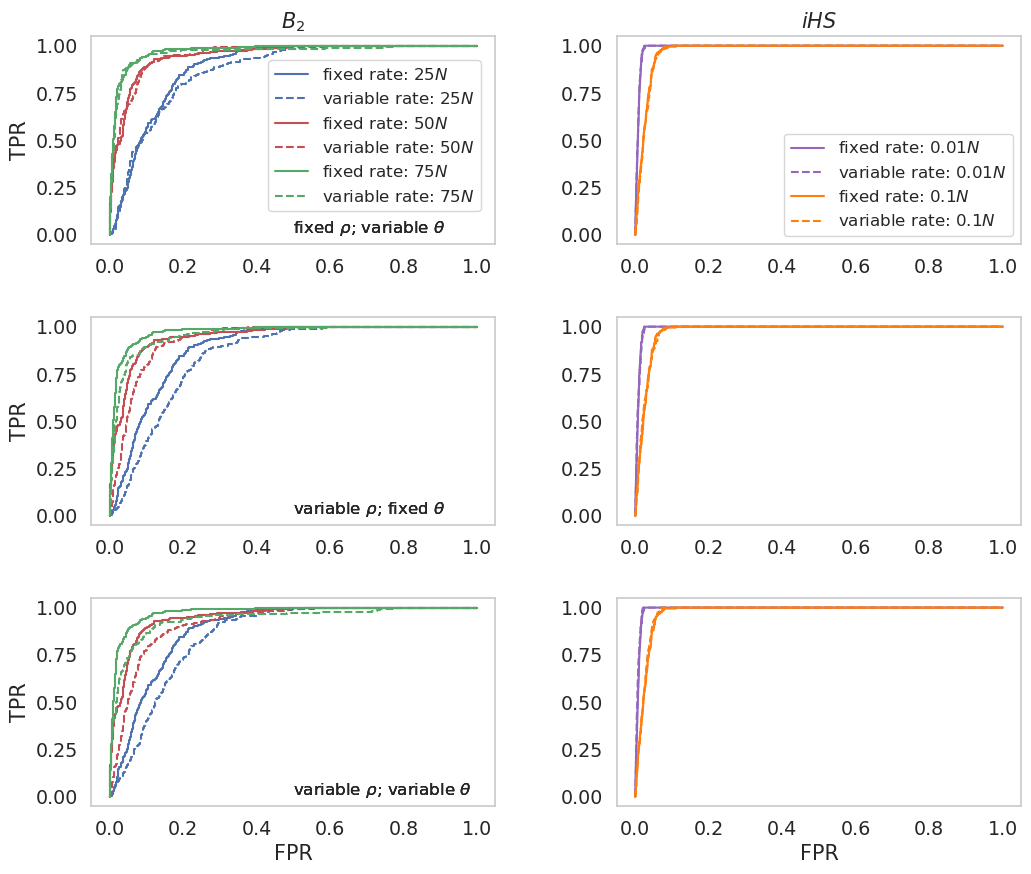

In [160]:
labs = [r'fixed ' + u'$\u03C1$;' + ' variable ' + r'$\theta$',
        r'variable ' + u'$\u03C1$;' + ' fixed ' + r'$\theta$', r'variable ' + u'$\u03C1$;' + ' variable ' + r'$\theta$']
DFE = [[0.1,0.7,0.1,0.1],
      [0.1,0.1,0.7,0.1],
      [0.1,0.1,0.1,0.7],
      [0.25,0.25,0.25,0.25],
      [0.5,0,0,0.5],
      [0.7,0,0,0.3]]
DFE_x = [a for a in range(0,4)]

cols = {0.01: 'tab:purple', 0.1: 'tab:orange', 25:'b',50:'r',75:'g'}

maxRep = 201
winSize = 100
chr_len = 85005
demog='stationary'
rates=['rr_fixed_mu_variable', 'rr_variable_mu_fixed', 'rr_variable_mu_variable']
bp_pos = 40342
plts = [1,3,5]
sns.set(rc={'figure.figsize':(12,10),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
for r, rate in enumerate(rates):
    plt.subplot(3,2,plts[r])
    for N in [25, 50, 75]:
        rdf = pd.DataFrame()
        rdf2 = pd.DataFrame()
        for rep in range(1, maxRep):
            try:
                df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/BM_inputFiles/results/stationary" +
                                 "/rr_fixed_mu_fixed/demog_DFE/100/hSap_DFE" + str(1) + 
                                 "_rep" + str(rep) + "_" + str(N) + "N.B2", 
                                 sep='\t', header=0)

                df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)],
                                  labels=[x for x in range(1, chr_len, winSize)])
                df['bp'] = np.where(df.physPos == bp_pos, 1, 0)
                df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
                df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
                df = pd.merge(df1,df2, left_index=True, right_index=True)
                df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
                df['bp'] = np.where(df.bp > 1, 1, df.bp)
                rdf = pd.concat([rdf, df])
            except Exception:
                pass

            try:
                df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/BM_inputFiles/results/stationary/" + 
                                 rate+"/demog_DFE/100/hSap_DFE" + str(1) + 
                                 "_rep" + str(rep) + "_" + str(N) + "N.B2", 
                                 sep='\t', header=0)

                df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)],
                                  labels=[x for x in range(1, chr_len, winSize)])
                df['bp'] = np.where(df.physPos == bp_pos, 1, 0)
                df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
                df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
                df = pd.merge(df1,df2, left_index=True, right_index=True)
                df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
                df['bp'] = np.where(df.bp > 1, 1, df.bp)
                rdf2 = pd.concat([rdf2, df])
            except Exception:
                pass

        y = rdf.bp
        scores = rdf.CLR
        fpr, tpr, thresholds = metrics.roc_curve(y, scores)
        tdf = pd.DataFrame([fpr, tpr]).T
        plt.plot(fpr, tpr, label="fixed rate: " + str(N) + r"$N$", c=cols[N])
        plt.text(s=labs[r], x=0.5, y=0.01, fontsize=12)
        
        y = rdf2.bp
        scores = rdf2.CLR
        fpr, tpr, thresholds = metrics.roc_curve(y, scores)
        tdf = pd.DataFrame([fpr, tpr]).T
        plt.plot(fpr, tpr, label="variable rate: " + str(N) + r"$N$", linestyle='dashed', c=cols[N])
        
        if(rate=='rr_fixed_mu_variable'):
            plt.legend(bbox_to_anchor=(0.4175, 0.925), fontsize=12)
            plt.title(r"$B_2$")
        elif(rate=='rr_variable_mu_variable'):
            plt.xlabel('FPR')
        plt.ylabel('TPR')
                
    plt.subplot(3,2,plts[r]+1)
    for N in [0.01, 0.1]:
        rdf = pd.DataFrame()
        rdf2 = pd.DataFrame()
        for rep in range(1, maxRep):
            try:
                df = pd.read_csv(r'/home/vivak/balancing_selection/scripts/ihs/output/stationary' +
                                 "/rr_fixed_mu_fixed/demog_DFE/100/hSap_DFE" + str(1) + 
                                     "_rep" + str(rep) + "_" + str(N) + "N.ihs.out",
                                names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')

                df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                                  labels=[x for x in range(1, chr_len, winSize)])
                df['bp'] = np.where(df.pos == bp_pos, 1, 0)
                df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
                df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
                df = pd.merge(df1,df2, left_index=True, right_index=True)
                df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
                df['bp'] = np.where(df.bp > 1, 1, df.bp)
                rdf = pd.concat([rdf, df])
            except Exception:
                pass
            try:
                df = pd.read_csv(r'/home/vivak/balancing_selection/scripts/ihs/output/stationary/' +
                                 rate+"/demog_DFE/100/hSap_DFE" + str(1) + 
                                     "_rep" + str(rep) + "_" + str(N) + "N.ihs.out",
                                names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')


                df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                                  labels=[x for x in range(1, chr_len, winSize)])
                df['bp'] = np.where(df.pos == bp_pos, 1, 0)
                df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
                df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
                df = pd.merge(df1,df2, left_index=True, right_index=True)
                df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
                df['bp'] = np.where(df.bp > 1, 1, df.bp)
                rdf2 = pd.concat([rdf2, df])
            except Exception:
                pass
            
        y = rdf.bp
        scores = rdf.ihs
        fpr, tpr, thresholds = metrics.roc_curve(y, scores)
        tdf = pd.DataFrame([fpr, tpr]).T
        plt.plot(fpr, tpr, label="fixed rate: " + str(N) + r"$N$", c=cols[N])

        y = rdf2.bp
        scores = rdf2.ihs
        fpr, tpr, thresholds = metrics.roc_curve(y, scores)
        tdf = pd.DataFrame([fpr, tpr]).T
        plt.plot(fpr, tpr, label="variable rate: " + str(N) + r"$N$", linestyle='dashed', c=cols[N])
        if(rate=='rr_fixed_mu_variable'):
            plt.legend(fontsize=12)
            plt.title(r"$iHS$")
        elif(rate=='rr_variable_mu_variable'):
            plt.xlabel('FPR')
    
    plt.subplots_adjust(wspace=0.3, hspace=0.35)    
plt.savefig('/home/vivak/balancing_selection/plots/fig4.tiff', format='tiff', dpi=300, bbox_inches='tight')
plt.savefig('/home/vivak/balancing_selection/plots/fig4.pdf', format='pdf', dpi=600, bbox_inches='tight')

<h2>Figure 5</h2>

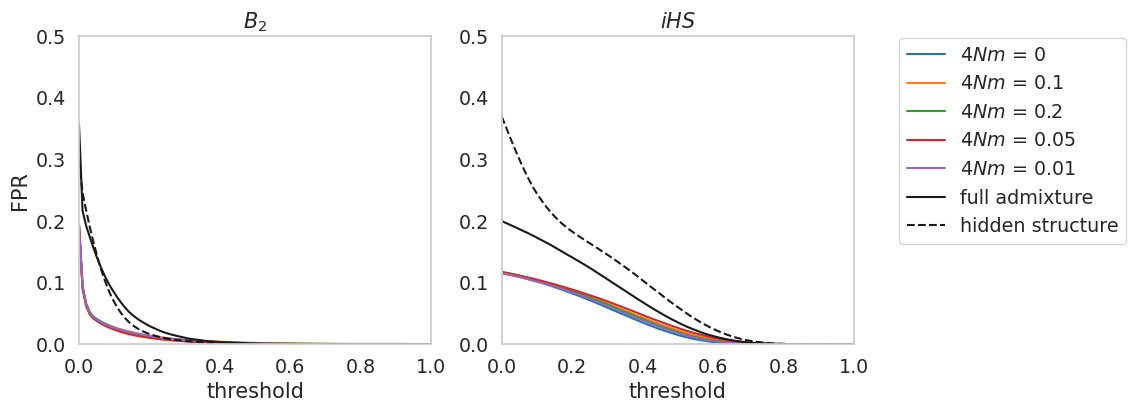

In [17]:
cols = ['tab:blue',
'tab:orange',
'tab:green',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan']

chr_len=85005
winSize=100
N = 73105
bp_pos = 40342
m = [0, 2.5e-6, 5e-6, 1.25e-6, 2.5e-7]
sns.set(rc={'figure.figsize':(10,4),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
plt.subplot(1,2,1)
rdf2 = pd.DataFrame()
for c,N in enumerate([0,1,2,3,4]):
    rdf2 = pd.DataFrame()
    for rep in range(1, 1001):
        try:
            df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/fsc/B2/output/" + str(N) +"_rep" + str(rep) + ".B2", sep='\t', header=0)

            df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)],
                              labels=[x for x in range(1, chr_len, winSize)])
            df['bp'] = np.where(df.physPos == bp_pos, 1, 0)
            df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
            df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
            df = pd.merge(df1,df2, left_index=True, right_index=True)
            df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
            df['bp'] = np.where(df.bp > 1, 1, df.bp)
            rdf2 = pd.concat([rdf2, df])
        except Exception:
            pass


    thresholds = np.linspace(0, rdf2.CLR.max(), 100)
    fp = [len(rdf2[rdf2.CLR > x]) for x in thresholds]
    tn = [len(rdf2[rdf2.CLR <= x]) for x in thresholds]
    bdf = pd.DataFrame([thresholds,fp,tn]).T
    bdf.columns = ['threshold','fp','tn']
    bdf['fpr'] = bdf.fp/(bdf.fp+bdf.tn)
    bdf['threshold_normalised'] = (bdf.threshold - bdf.threshold.min()) / (bdf.threshold.max() - bdf.threshold.min())

    plt.plot(bdf.threshold_normalised, bdf.fpr, label=str(np.round(m[c]*4*10000, 3)), c=cols[c])

rdf2 = pd.DataFrame()
for rep in range(1, 1001):
    try:
        df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/fsc/B2/output/3pop_admixture_rep" + str(rep) + ".B2", sep='\t', header=0)

        df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)],
                          labels=[x for x in range(1, chr_len, winSize)])
        df['bp'] = np.where(df.physPos == bp_pos, 1, 0)
        df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
        df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
        df = pd.merge(df1,df2, left_index=True, right_index=True)
        df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
        df['bp'] = np.where(df.bp > 1, 1, df.bp)
        rdf2 = pd.concat([rdf2, df])
    except Exception:
        pass


thresholds = np.linspace(0, rdf2.CLR.max(), 100)
fp = [len(rdf2[rdf2.CLR > x]) for x in thresholds]
tn = [len(rdf2[rdf2.CLR <= x]) for x in thresholds]
bdf = pd.DataFrame([thresholds,fp,tn]).T
bdf.columns = ['threshold','fp','tn']
bdf['fpr'] = bdf.fp/(bdf.fp+bdf.tn)
bdf['threshold_normalised'] = (bdf.threshold - bdf.threshold.min()) / (bdf.threshold.max() - bdf.threshold.min())

plt.plot(bdf.threshold_normalised, bdf.fpr, c='k', label='isolation + migration')    


rdf2 = pd.DataFrame()
for rep in range(1, 1001):
    try:
        df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/fsc/B2/output/3pop_2sample_rep" + str(rep) + ".B2", sep='\t', header=0)

        df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)],
                          labels=[x for x in range(1, chr_len, winSize)])
        df['bp'] = np.where(df.physPos == bp_pos, 1, 0)
        df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
        df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
        df = pd.merge(df1,df2, left_index=True, right_index=True)
        df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
        df['bp'] = np.where(df.bp > 1, 1, df.bp)
        rdf2 = pd.concat([rdf2, df])
    except Exception:
        pass


thresholds = np.linspace(0, rdf2.CLR.max(), 100)
fp = [len(rdf2[rdf2.CLR > x]) for x in thresholds]
tn = [len(rdf2[rdf2.CLR <= x]) for x in thresholds]
bdf = pd.DataFrame([thresholds,fp,tn]).T
bdf.columns = ['threshold','fp','tn']
bdf['fpr'] = bdf.fp/(bdf.fp+bdf.tn)
bdf['threshold_normalised'] = (bdf.threshold - bdf.threshold.min()) / (bdf.threshold.max() - bdf.threshold.min())

plt.plot(bdf.threshold_normalised, bdf.fpr, linestyle='--', c='k', label='isolation + admixture') 


plt.xlabel('threshold')
plt.ylim([0,0.5])    
plt.ylabel('FPR')
plt.margins(0)
plt.title('$B_2$')

plt.subplot(1,2,2)
for c,N in enumerate([0,1,2,3,4]):
    rdf2 = pd.DataFrame()
    for rep in range(1, 1001):
        try:
            df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/fsc/ihs/" + str(N) +"/rep" + str(rep) + ".ihs.out", 
                             names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')

            df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                              labels=[x for x in range(1, chr_len, winSize)])
            df['bp'] = np.where(df.pos == bp_pos, 1, 0)
            df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
            df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
            df = pd.merge(df1,df2, left_index=True, right_index=True)
            df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
            df['bp'] = np.where(df.bp > 1, 1, df.bp)
            rdf2 = pd.concat([rdf2, df])
        except Exception:
            pass


    thresholds = np.linspace(0, rdf2.ihs.max(), 100)
    fp = [len(rdf2[rdf2.ihs > x]) for x in thresholds]
    tn = [len(rdf2[rdf2.ihs <= x]) for x in thresholds]
    bdf = pd.DataFrame([thresholds,fp,tn]).T
    bdf.columns = ['threshold','fp','tn']
    bdf['fpr'] = bdf.fp/(bdf.fp+bdf.tn)
    bdf['threshold_normalised'] = (bdf.threshold - bdf.threshold.min()) / (bdf.threshold.max() - bdf.threshold.min())

    plt.plot(bdf.threshold_normalised, bdf.fpr, label= r"4$Nm$ = " + str(np.round(m[c]*4*10000, 3)), c=cols[c])
    
    
    
rdf2 = pd.DataFrame()
for rep in range(1, 1001):
    try:
        df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/fsc/ihs/3pop_admixture/rep" + str(rep) + ".ihs.out", 
                         names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')

        df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                          labels=[x for x in range(1, chr_len, winSize)])
        df['bp'] = np.where(df.pos == bp_pos, 1, 0)
        df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
        df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
        df = pd.merge(df1,df2, left_index=True, right_index=True)
        df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
        df['bp'] = np.where(df.bp > 1, 1, df.bp)
        rdf2 = pd.concat([rdf2, df])
    except Exception:
        pass    

thresholds = np.linspace(0, rdf2.ihs.max(), 100)
fp = [len(rdf2[rdf2.ihs > x]) for x in thresholds]
tn = [len(rdf2[rdf2.ihs <= x]) for x in thresholds]
bdf = pd.DataFrame([thresholds,fp,tn]).T
bdf.columns = ['threshold','fp','tn']
bdf['fpr'] = bdf.fp/(bdf.fp+bdf.tn)
bdf['threshold_normalised'] = (bdf.threshold - bdf.threshold.min()) / (bdf.threshold.max() - bdf.threshold.min())

plt.plot(bdf.threshold_normalised, bdf.fpr, c='k', label='full admixture')    

rdf2 = pd.DataFrame()
for rep in range(1, 1001):
    try:
        df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/fsc/ihs/3pop_2sample/rep" + str(rep) + ".ihs.out", 
                         names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')

        df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                          labels=[x for x in range(1, chr_len, winSize)])
        df['bp'] = np.where(df.pos == bp_pos, 1, 0)
        df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
        df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
        df = pd.merge(df1,df2, left_index=True, right_index=True)
        df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
        df['bp'] = np.where(df.bp > 1, 1, df.bp)
        rdf2 = pd.concat([rdf2, df])
    except Exception:
        pass    

thresholds = np.linspace(0, rdf2.ihs.max(), 100)
fp = [len(rdf2[rdf2.ihs > x]) for x in thresholds]
tn = [len(rdf2[rdf2.ihs <= x]) for x in thresholds]
bdf = pd.DataFrame([thresholds,fp,tn]).T
bdf.columns = ['threshold','fp','tn']
bdf['fpr'] = bdf.fp/(bdf.fp+bdf.tn)
bdf['threshold_normalised'] = (bdf.threshold - bdf.threshold.min()) / (bdf.threshold.max() - bdf.threshold.min())

plt.plot(bdf.threshold_normalised, bdf.fpr, c='k', linestyle='--', label='hidden structure') 


plt.xlabel('threshold')
plt.ylim([0,0.5])
plt.margins(0)
plt.title(r'$iHS$')
plt.legend(bbox_to_anchor=(1.8, 1.025))
plt.savefig('/home/vivak/balancing_selection/plots/fig5.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.savefig('/home/vivak/balancing_selection/plots/fig5.tiff', format='tiff', dpi=300, bbox_inches='tight')

<h2>Supplementary Figures S3 onwards</h2>

1.0
1.0
1.0


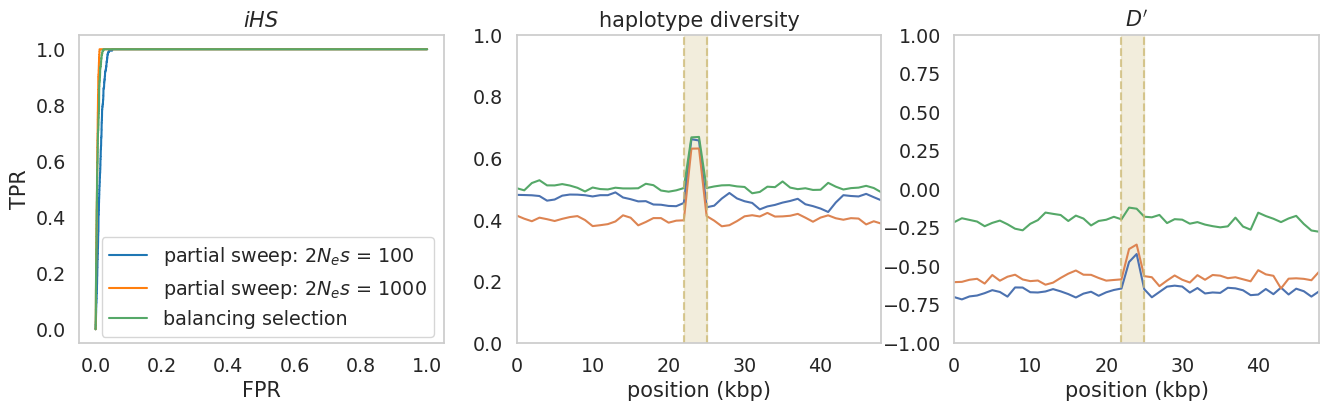

In [12]:
sns.set(rc={'figure.figsize':(16, 12),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.5)

####PARTIAL SWEEP####
bp_pos = 25000
maxRep = 200
sns.set(rc={'figure.figsize':(16,4),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
plt.subplot(1,3,1)
for c,N in enumerate([100, 1000]):
    rdf = pd.DataFrame()
    for rep in range(1, maxRep):
        df = pd.read_csv(r'/home/vivak/balancing_selection/scripts/ihs/output/partial_sweep/hSap_rep' + str(rep) + '_' + str(N) +'.ihs.out',
                        names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')
    
        df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                          labels=[x for x in range(1, chr_len, winSize)])
        df['bp'] = np.where(df.pos == bp_pos, 1, 0)
        df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
        df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
        df = pd.merge(df1,df2, left_index=True, right_index=True)
        df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
        df['bp'] = np.where(df.bp > 1, 1, df.bp)
        rdf = pd.concat([rdf, df])
    
    y = rdf.bp
    scores = rdf.ihs
    fpr, tpr, thresholds = metrics.roc_curve(y, scores)
    tdf = pd.DataFrame([fpr, tpr]).T
    print(str(tdf[tdf[0]<=0.05][1].max()))
    plt.plot(fpr, tpr, label= r"partial sweep: 2$N_es$ = " + str(N), c=cols[c])

bp_pos = 24999    
rdf = pd.DataFrame()
for rep in range(1, maxRep):
    df = pd.read_csv(r'/home/vivak/balancing_selection/scripts/ihs/output/stationary/rr_fixed_mu_fixed/demog_only/100/hSap_rep' + str(rep) + '_0.01N.ihs.out',
                    names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')

    df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                      labels=[x for x in range(1, chr_len, winSize)])
    df['bp'] = np.where(df.pos == bp_pos, 1, 0)
    df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
    df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
    df = pd.merge(df1,df2, left_index=True, right_index=True)
    df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
    df['bp'] = np.where(df.bp > 1, 1, df.bp)
    rdf = pd.concat([rdf, df])
    
y = rdf.bp
scores = rdf.ihs
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
tdf = pd.DataFrame([fpr, tpr]).T
print(str(tdf[tdf[0]<=0.05][1].max()))
plt.plot(fpr, tpr, label= 'balancing selection', c='g')
    
plt.legend(bbox_to_anchor=(1, 0.375))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(r'$iHS$')


demog='stationary'
rr='fixed'
mu='fixed'
wlim = 48
####PLOT SUMMARY STATS FOR A SINGLE SCENARIO####
lst = [0,3,6,9]
ylabs = [r"haplotype diversity", r"$D'$"]
ylims = [[0, 1], [-1, 1]]
N_list = [100, 1000]
df_list = []
for N in N_list:
    df1 = pd.DataFrame()
    for rep in range(1, 201):
        try:
            tdf = pd.read_csv(r"/home/vivak/balancing_selection/summary_stats/partial_sweep/hSap_rep" + 
                              str(rep) + '_' + str(N) + '.stats', sep='\t',header=0)
            df1 = pd.concat([df1, tdf])
            df1['divergence'] = df1['divergence'] / N


        except Exception:
            pass

    l = [tdf.window]
    for stat in ('thetapi', 'tajimasd', 'meanrsq', 'numpoly', 'numsingletons', 'nhaps', 'divergence', 'hapdiv', 'meanDprime'):
        l.append(df1.groupby('window')[stat].mean())

    df1 = pd.DataFrame(l).T
    df1 = df1[df1.window<=wlim] 
    df_list.append(df1)
    
    
df1 = pd.DataFrame()
for rep in range(1, 201):
    try:
        tdf = pd.read_csv(r"/home/vivak/balancing_selection/summary_stats/"+demog+
                          "/rr_"+rr+"_mu_"+mu+ "/demog_only/100/hSap_rep" + 
                          str(rep) + '_' + str(0.01) + 'N.stats', sep='\t',header=0)
        df1 = pd.concat([df1, tdf])
        df1['divergence'] = df1['divergence'] / 0.01


    except Exception:
        pass

l = [tdf.window]
for stat in ('thetapi', 'tajimasd', 'meanrsq', 'numpoly', 'numsingletons', 'nhaps', 'divergence', 'hapdiv', 'meanDprime'):
    l.append(df1.groupby('window')[stat].mean())

df1 = pd.DataFrame(l).T
df1 = df1[df1.window<=wlim] 
df_list.append(df1)
    

for a, stat in enumerate(['hapdiv', 'meanDprime']):
    plt.subplot(1,3,a+2)
    for b, df in enumerate(df_list):
        plt.plot(df[stat], label= str(N))   
    plt.axvline(22, color='y', linestyle='--', alpha=0.75)
    plt.axvline(25, color='y', linestyle='--', alpha=0.75)
    plt.fill_betweenx([-5, 150], [22], [25], alpha=0.25, color='y')
    plt.ylim([ylims[a][0], ylims[a][1]])
    plt.xlabel('position (kbp)')
    if(a==4):
        plt.legend(bbox_to_anchor=(1, 1.0), title='2' + '$N_es$')
    plt.title(ylabs[a])

    plt.margins(x=0)

    
# #Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.25)
plt.savefig('/home/vivak/balancing_selection/plots/S3.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.savefig('/home/vivak/balancing_selection/plots/S3.tiff', format='tiff', dpi=300, bbox_inches='tight')

In [61]:
for demog in ['stationary']:
    for rr in ['fixed', 'variable']:
        for mu in ['fixed', 'variable']:

            wlim = 84
            ####PLOT SUMMARY STATS FOR A SINGLE SCENARIO####
            lst = [0,3,6,9,12]
            ylabs = [r'$\pi$', r"Tajima's $D$", r"haplotype diversity", r"$D'$"]
            ylims = [[0, 15], [-1.5,8], [0,1], [-1, 1]]
            N_list = [0.01, 0.1, 25, 50, 75]
            r_list = [1,5,9,13,17,21]
            sns.set(rc={'figure.figsize':(16, 18),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)

            for DFE in range(1,7):
                df_list = []
                for N in N_list:
                    df1 = pd.DataFrame()
                    for rep in range(1, 201):
                        try:
                            tdf = pd.read_csv(r"/home/vivak/balancing_selection/summary_stats/"+demog+
                                              "/rr_"+rr+"_mu_"+mu+ "/demog_DFE/100/hSap_DFE"+str(DFE)+"_rep" + 
                                              str(rep) + '_' + str(N) + 'N.stats', sep='\t',header=0)
                            df1 = pd.concat([df1, tdf])


                        except Exception:
                            pass

                    l = [tdf.window]
                    for stat in ('thetapi', 'tajimasd', 'hapdiv', 'meanDprime'):
                        l.append(df1.groupby('window')[stat].mean())

                    df1 = pd.DataFrame(l).T
                    df1 = df1[df1.window<=wlim] 
                    df_list.append(df1)

                for a, stat in enumerate(['thetapi', 'tajimasd', 'hapdiv', 'meanDprime']):
                    plt.subplot(6,4,r_list[DFE-1]+a)
                    for b, df in enumerate(df_list):
                        plt.plot(df[stat], label= str(N_list[b]))   
                    plt.axvline(39, color='y', linestyle='--', alpha=0.75)
                    plt.axvline(40, color='y', linestyle='--', alpha=0.75)
                    plt.fill_betweenx([-5, 150], [39], [40], alpha=0.25, color='y')
                    plt.ylim([ylims[a][0], ylims[a][1]])
                    if(r_list[DFE-1]+a>=21):
                        plt.xlabel('position (kbp)')
                    else:
                        plt.xticks([])
                    if(r_list[DFE-1]+a==4):
                        plt.legend(bbox_to_anchor=(1, 1.05), title=r'$\tau_b$' + ' ($N$ generations)')
                    if(r_list[DFE-1]+a<=4):
                        plt.title(ylabs[a])
                        
                    if(r_list[DFE-1]+a==1):
                        plt.text(s='DFE 1', x=1, y=13)
                    elif(r_list[DFE-1]+a==5):
                        plt.text(s='DFE 2', x=1, y=13)
                    elif(r_list[DFE-1]+a==9):
                        plt.text(s='DFE 3', x=1, y=13)
                    elif(r_list[DFE-1]+a==13):
                        plt.text(s='DFE 4', x=1, y=13)
                    elif(r_list[DFE-1]+a==17):
                        plt.text(s='DFE 5', x=1, y=13)
                    elif(r_list[DFE-1]+a==21):
                        plt.text(s='DFE 6', x=1, y=13)

                    plt.margins(x=0)

            # #Adjust spacing between subplots
            plt.subplots_adjust(wspace=0.25, hspace=0.3)
            plt.savefig('/home/vivak/balancing_selection/plots/' + demog + '_rr_' + rr + '_mu_' + mu + '_DFE_stats.tiff', format='tiff', dpi=300, bbox_inches='tight')
            plt.close()

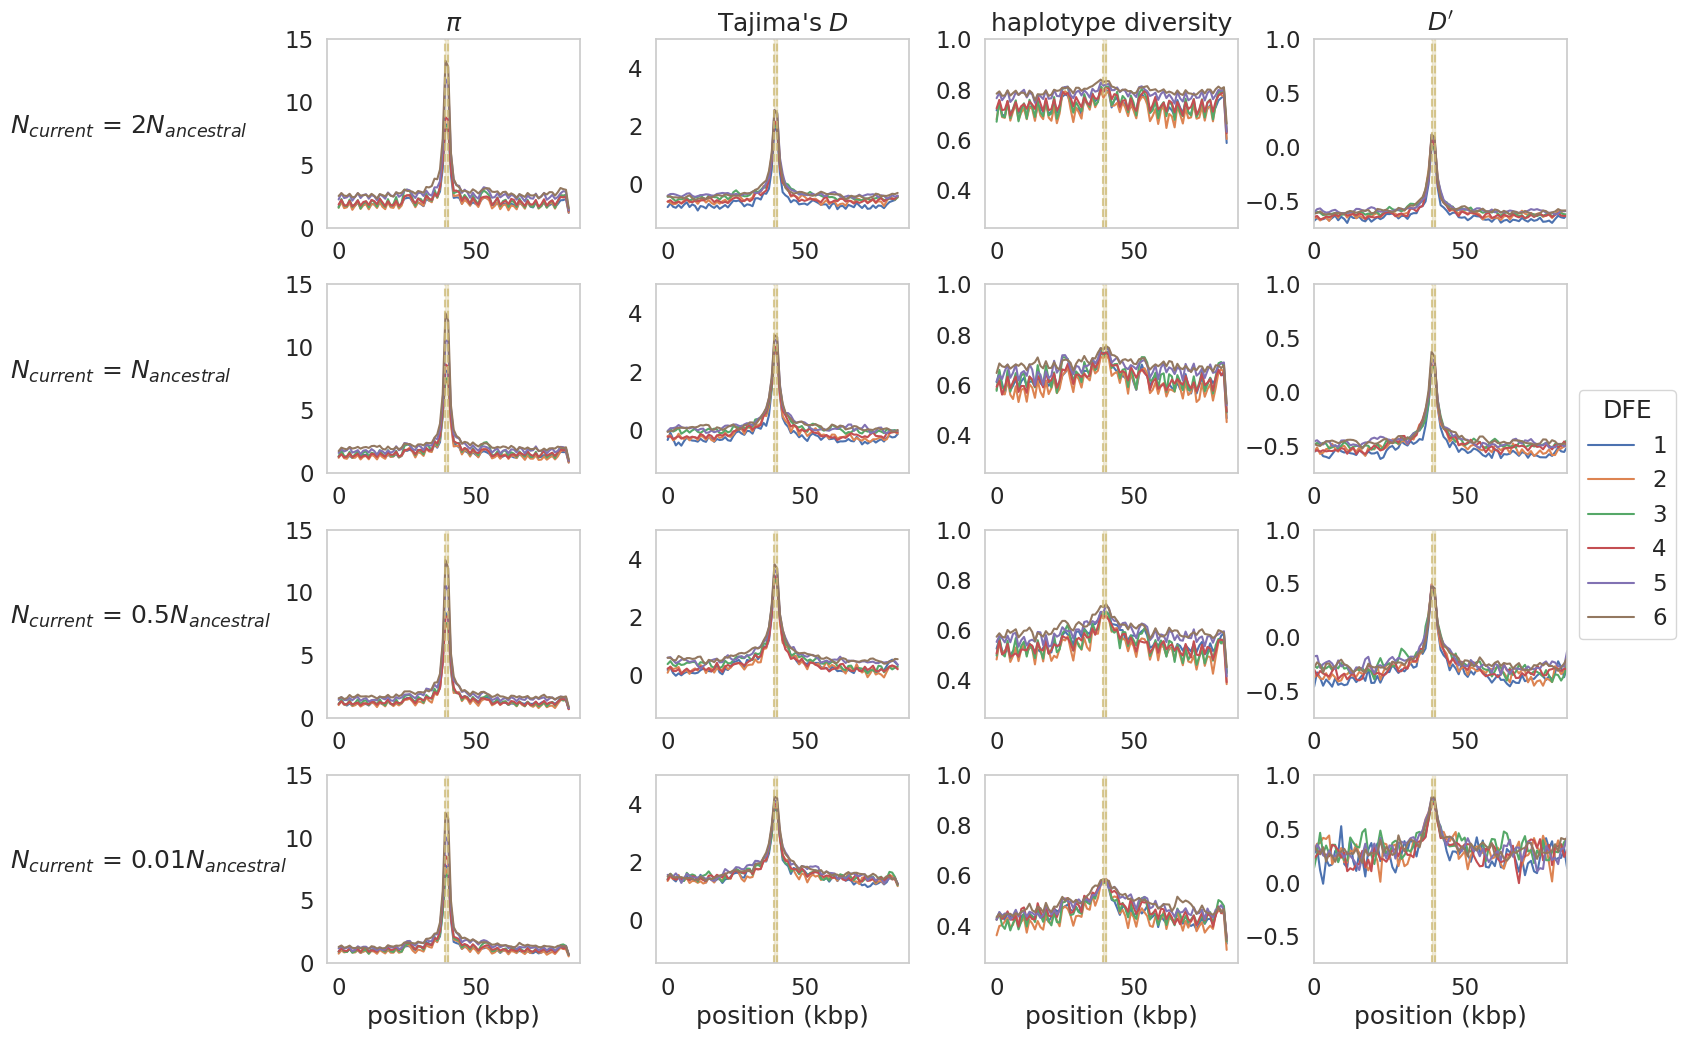

In [13]:
wlim = 84
####PLOT SUMMARY STATS FOR A SINGLE SCENARIO####
sns.set(rc={'figure.figsize':(16, 12),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.5)

lst = [1,5,9,13]
ylabs = [r'$\pi$', r"Tajima's $D$", r"haplotype diversity", r"$D'$"]
ylims = [[0, 15], [-1.5,5], [0.25,1], [-0.75, 1]]
titles = [r'$N_{current}$ = 2$N_{ancestral}$', r'$N_{current}$ = $N_{ancestral}$', r'$N_{current}$ = 0.5$N_{ancestral}$', r'$N_{current}$ = 0.01$N_{ancestral}$']
for d, demog in enumerate([20000, 10000, 5000, 100]):
    df_list = []
    for DFE in range(1, 7):
        df1 = pd.DataFrame()
        for rep in range(1, 201):
            if(demog != 10000):
                try:
                    tdf = pd.read_csv(r"/home/vivak/balancing_selection/demog/B2/" + str(demog) + '_rr_fixed_mu_fixed_hSap_DFE' + str(DFE) + '_rep' + str(rep) + '_75N.stats',
                                         sep='\t', header=0)
                    df1 = pd.concat([df1, tdf])
                except Exception:
                    pass
            else:
                try:
                    tdf = df = pd.read_csv(r"/home/vivak/balancing_selection/summary_stats/stationary/" + 
                                             "rr_fixed_mu_fixed/demog_DFE/100/hSap_DFE" + str(DFE) + "_rep" + str(rep) + "_75N.stats", sep='\t', header=0)
                    df1 = pd.concat([df1, tdf])
                except Exception:
                    pass

        l = [tdf.window]
        for stat in ('thetapi', 'tajimasd', 'meanrsq', 'numpoly', 'numsingletons', 'nhaps', 'divergence', 'hapdiv', 'meanDprime'):
            l.append(df1.groupby('window')[stat].mean())

        df1 = pd.DataFrame(l).T
        df1 = df1[df1.window<=wlim] 
        df_list.append(df1)

    for a, stat in enumerate(['thetapi', 'tajimasd', 'hapdiv', 'meanDprime']):
        plt.subplot(4,4,a+lst[d])
        for b, df in enumerate(df_list):
            plt.plot(df[stat], label= str(b+1))   
        plt.axvline(39, color='y', linestyle='--', alpha=0.75)
        plt.axvline(40, color='y', linestyle='--', alpha=0.75)
        plt.fill_betweenx([-5, 150], [39], [40], alpha=0.25, color='y')
        plt.ylim([ylims[a][0], ylims[a][1]])
        if(demog==100):
            plt.xlabel('position (kbp)')
        if((a==3) & (demog==10000)):
            plt.legend(bbox_to_anchor=(1, 0.5), title='DFE')
        if(demog==20000):
            plt.title(ylabs[a])
        if(stat=='thetapi'):
            plt.text(s = titles[d], x=-120, y=7.5)

    plt.margins(x=0)

# # #Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig('/home/vivak/balancing_selection/plots/S5.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.savefig('/home/vivak/balancing_selection/plots/S5.tiff', format='tiff', dpi=300, bbox_inches='tight')

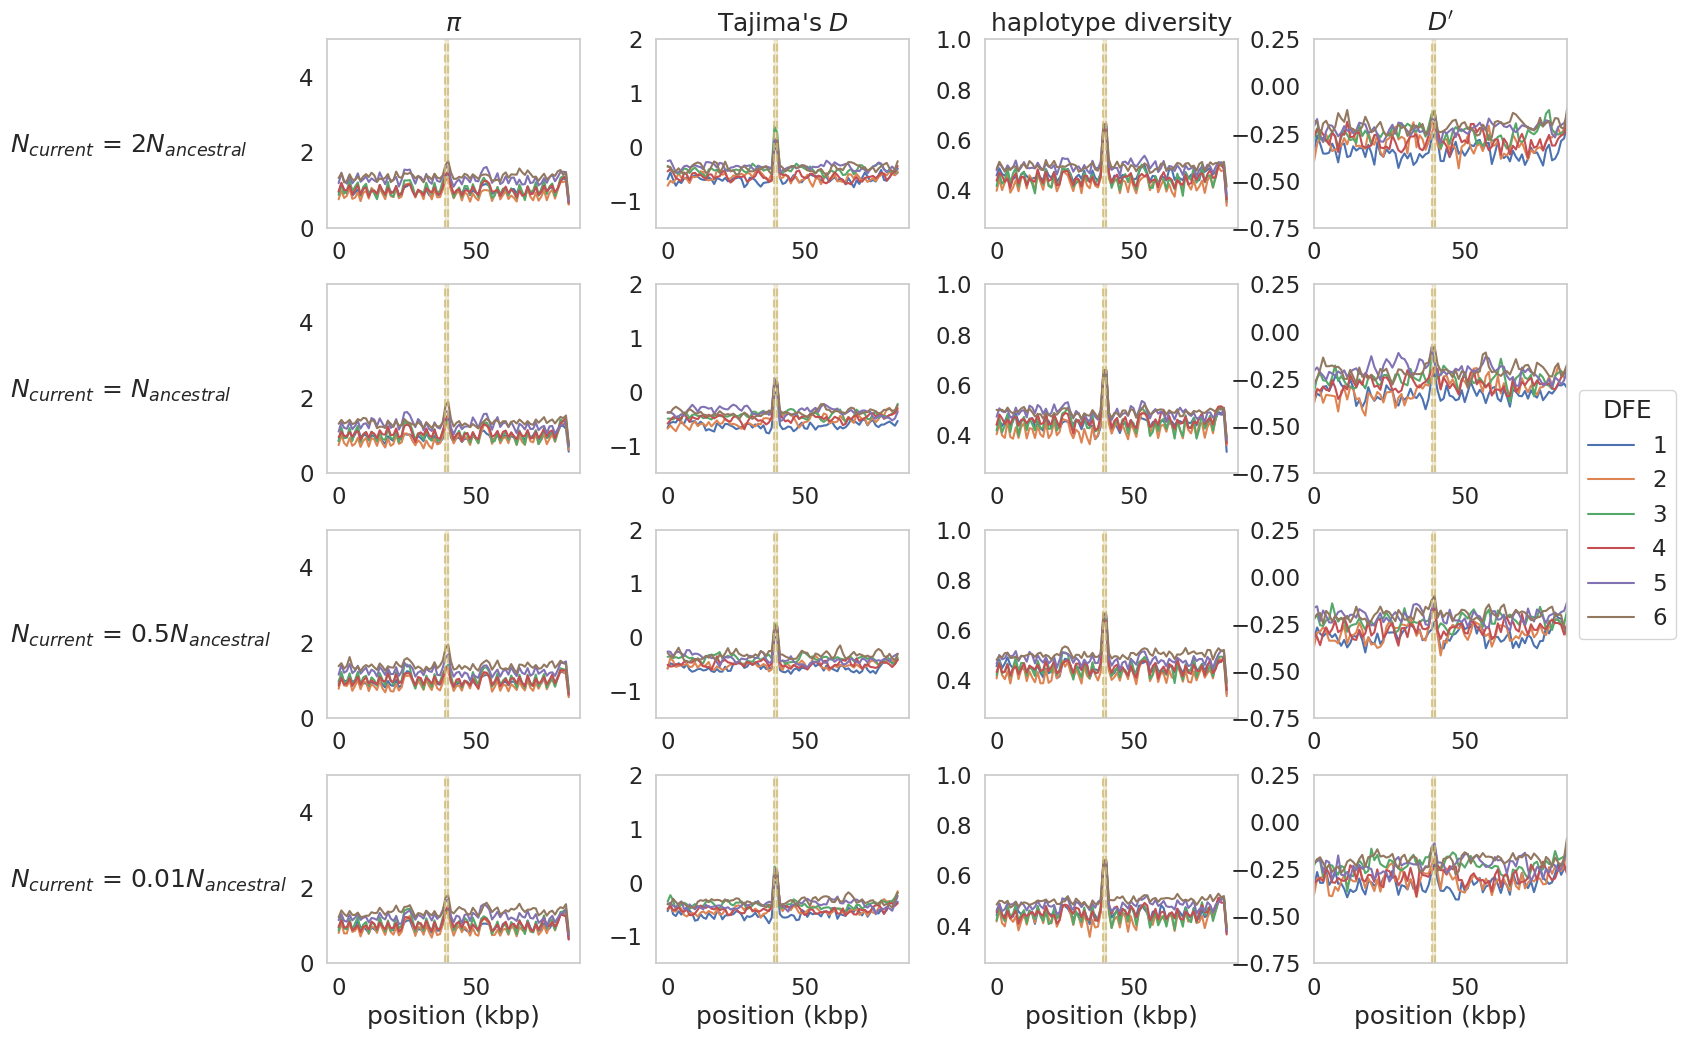

In [16]:
wlim = 84
####PLOT SUMMARY STATS FOR A SINGLE SCENARIO####
sns.set(rc={'figure.figsize':(16, 12),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.5)

lst = [1,5,9,13]
ylabs = [r'$\pi$', r"Tajima's $D$", r"haplotype diversity", r"$D'$"]
ylims = [[0, 5], [-1.5,2], [0.25,1], [-0.75, 0.25]]
titles = [r'$N_{current}$ = 2$N_{ancestral}$', r'$N_{current}$ = $N_{ancestral}$', r'$N_{current}$ = 0.5$N_{ancestral}$', r'$N_{current}$ = 0.01$N_{ancestral}$']
for d, demog in enumerate([20000, 10000, 5000, 100]):
    df_list = []
    for DFE in range(1, 7):
        df1 = pd.DataFrame()
        for rep in range(1, 201):
            if(demog != 10000):
                try:
                    tdf = pd.read_csv(r"/home/vivak/balancing_selection/demog/iHS/" + str(demog) + '_rr_fixed_mu_fixed_hSap_DFE' + str(DFE) + '_rep' + str(rep) + '_0.01N.stats',
                                         sep='\t', header=0)
                    df1 = pd.concat([df1, tdf])
                except Exception:
                    pass
            else:
                try:
                    tdf = df = pd.read_csv(r"/home/vivak/balancing_selection/summary_stats/stationary/" + 
                                             "rr_fixed_mu_fixed/demog_DFE/100/hSap_DFE" + str(DFE) + "_rep" + str(rep) + "_0.01N.stats", sep='\t', header=0)
                    df1 = pd.concat([df1, tdf])
                except Exception:
                    pass

        l = [tdf.window]
        for stat in ('thetapi', 'tajimasd', 'meanrsq', 'numpoly', 'numsingletons', 'nhaps', 'divergence', 'hapdiv', 'meanDprime'):
            l.append(df1.groupby('window')[stat].mean())

        df1 = pd.DataFrame(l).T
        df1 = df1[df1.window<=wlim] 
        df_list.append(df1)

    for a, stat in enumerate(['thetapi', 'tajimasd', 'hapdiv', 'meanDprime']):
        plt.subplot(4,4,a+lst[d])
        for b, df in enumerate(df_list):
            plt.plot(df[stat], label= str(b+1))   
        plt.axvline(39, color='y', linestyle='--', alpha=0.75)
        plt.axvline(40, color='y', linestyle='--', alpha=0.75)
        plt.fill_betweenx([-5, 150], [39], [40], alpha=0.25, color='y')
        plt.ylim([ylims[a][0], ylims[a][1]])
        if(demog==100):
            plt.xlabel('position (kbp)')
        if((a==3) & (demog==10000)):
            plt.legend(bbox_to_anchor=(1, 0.5), title='DFE')
        if(demog==20000):
            plt.title(ylabs[a])
        if(stat=='thetapi'):
            plt.text(s = titles[d], x=-120, y=2)

    plt.margins(x=0)

# # #Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig('/home/vivak/balancing_selection/plots/S6.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.savefig('/home/vivak/balancing_selection/plots/S6.tiff', format='tiff', dpi=300, bbox_inches='tight')

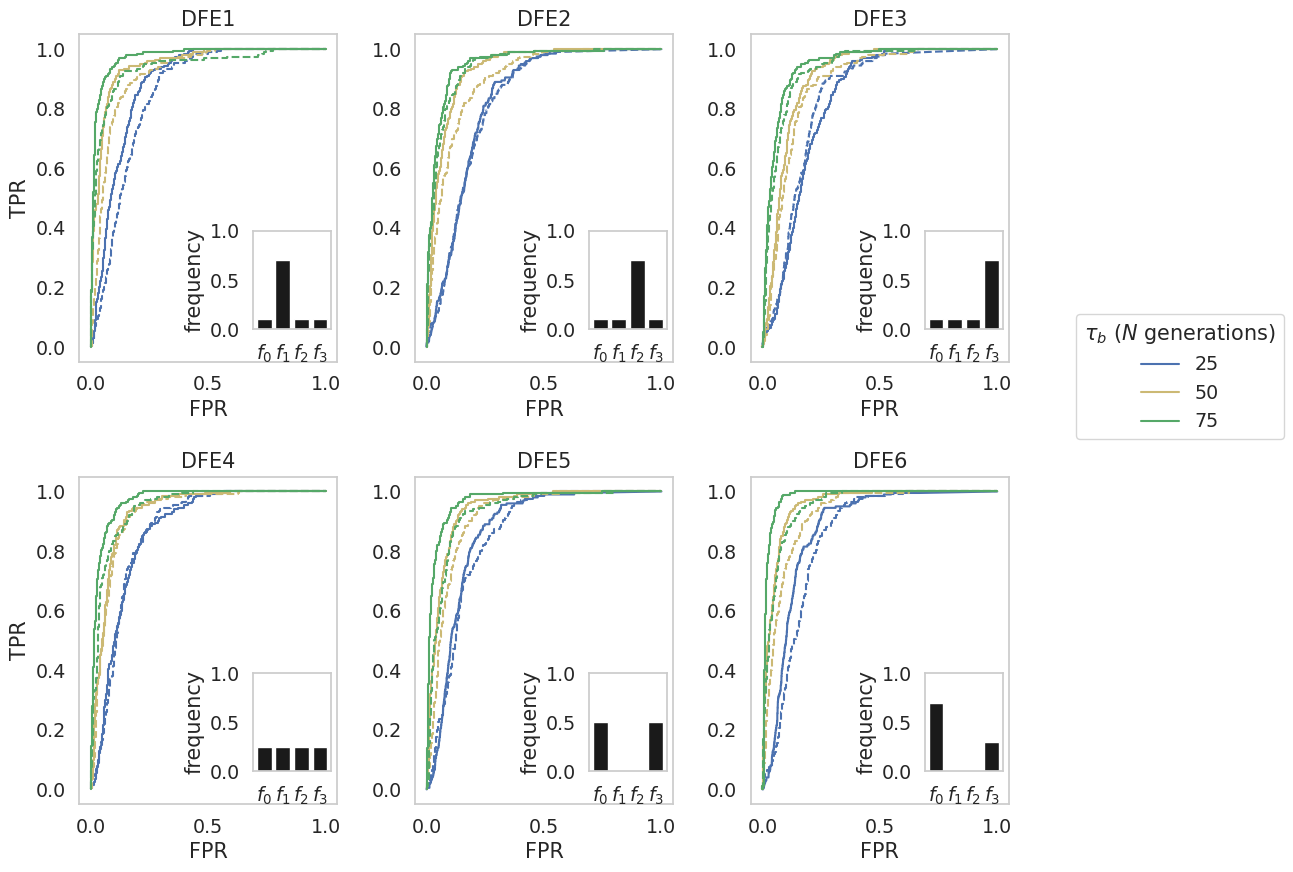

In [46]:
DFE = [[0.1,0.7,0.1,0.1],
      [0.1,0.1,0.7,0.1],
      [0.1,0.1,0.1,0.7],
      [0.25,0.25,0.25,0.25],
      [0.5,0,0,0.5],
      [0.7,0,0,0.3]]
DFE_x = [a for a in range(0,4)]

c = ['b', 'y', 'g']
maxRep = 201
winSize = 100
chr_len = 85005
rr='variable'
mu='variable'
bp_pos = 40342
for demog in ['stationary']:
    sns.set(rc={'figure.figsize':(12,10),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
    fig, axes = plt.subplots(2,3)
    for d, ax in enumerate(axes.flat):
        for n, N in enumerate([25, 50, 75]):
            rdf = pd.DataFrame()
            rdf2 = pd.DataFrame()
            for rep in range(1, maxRep):
                try:
                    df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/BM_inputFiles/results/" + demog +
                                     "/rr_fixed_mu_fixed/demog_DFE/100/hSap_DFE" + str(d+1) + 
                                     "_rep" + str(rep) + "_" + str(N) + "N.B2", 
                                     sep='\t', header=0)
    
                    df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)],
                                      labels=[x for x in range(1, chr_len, winSize)])
                    df['bp'] = np.where(df.physPos == bp_pos, 1, 0)
                    df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
                    df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
                    df = pd.merge(df1,df2, left_index=True, right_index=True)
                    df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
                    df['bp'] = np.where(df.bp > 1, 1, df.bp)
                    rdf = pd.concat([rdf, df])
                except Exception:
                    pass

                try:
                    df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/BM_inputFiles/results/" + demog +
                                     "/rr_"+rr+"_mu_"+mu+"/demog_DFE/100/hSap_DFE" + str(d+1) + 
                                     "_rep" + str(rep) + "_" + str(N) + "N.B2", 
                                     sep='\t', header=0)
    
                    df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)],
                                      labels=[x for x in range(1, chr_len, winSize)])
                    df['bp'] = np.where(df.physPos == bp_pos, 1, 0)
                    df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
                    df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
                    df = pd.merge(df1,df2, left_index=True, right_index=True)
                    df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
                    df['bp'] = np.where(df.bp > 1, 1, df.bp)
                    rdf2 = pd.concat([rdf2, df])
                except Exception:
                    pass
    
            y = rdf.bp
            scores = rdf.CLR
            fpr, tpr, thresholds = metrics.roc_curve(y, scores)
            tdf = pd.DataFrame([fpr, tpr]).T
            #print(demog + "; DFE" + str(d+1) + "; " + str(N) + "; " + str(tdf[tdf[0]<=0.05][1].max()))
            ax.plot(fpr, tpr, label=str(N), c=c[n])

            y = rdf2.bp
            scores = rdf2.CLR
            fpr, tpr, thresholds = metrics.roc_curve(y, scores)
            tdf = pd.DataFrame([fpr, tpr]).T
            #print(demog + "; DFE" + str(d+1) + "; " + str(N) + "; " + str(tdf[tdf[0]<=0.05][1].max()))
            ax.plot(fpr, tpr, linestyle='--', c=c[n])
    
        left, bottom, width, height = [0.675, 0.1, 0.3, 0.3]
        ax2 = ax.inset_axes([left, bottom, width, height])
        ax2.bar(x=DFE_x, height=DFE[d], color='k')
        if(d==2):
            ax.legend(bbox_to_anchor=(2.1, 0.175), title=r'$\tau_b$' + ' ($N$ generations)')
        ax.set_xlabel('FPR')
        ax.set_title("DFE"+str(d+1))
        if((d==0) | (d==3)):
            ax.set_ylabel('TPR')
        ax2.set_ylabel('frequency')
        ax2.set_xticks(DFE_x) 
        ax2.set_xticklabels([r'$f_0$', r'$f_1$', r'$f_2$', r'$f_3$'])
    
        ax2.set_yticks([0, 0.5, 1])
    
    plt.subplots_adjust(wspace=0.3, hspace=0.35)    
    plt.savefig('/home/vivak/balancing_selection/plots/ROC_DFE_' + demog + '_rr_'+rr+'_mu_'+mu+'.tiff', format='tiff', dpi=300, bbox_inches='tight')

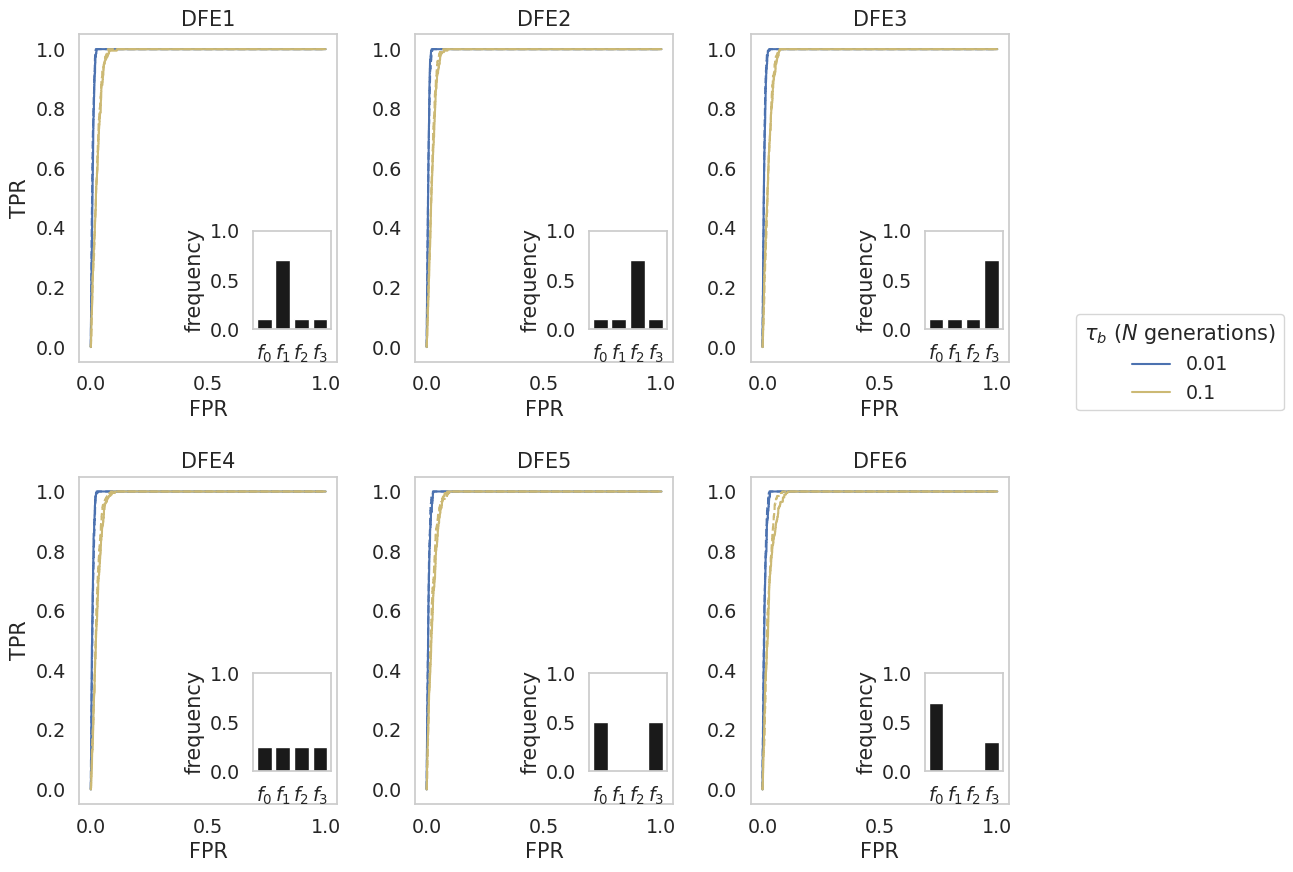

In [49]:
DFE = [[0.1,0.7,0.1,0.1],
      [0.1,0.1,0.7,0.1],
      [0.1,0.1,0.1,0.7],
      [0.25,0.25,0.25,0.25],
      [0.5,0,0,0.5],
      [0.7,0,0,0.3]]
DFE_x = [a for a in range(0,4)]

c = ['b', 'y', 'g']
maxRep = 201
winSize = 100
chr_len = 85005
rr='variable'
mu='variable'
bp_pos = 40342
for demog in ['stationary']:
    sns.set(rc={'figure.figsize':(12,10),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
    fig, axes = plt.subplots(2,3)
    for d, ax in enumerate(axes.flat):
        for n, N in enumerate([0.01, 0.1]):
            rdf = pd.DataFrame()
            rdf2 = pd.DataFrame()
            for rep in range(1, maxRep):
                try:
                    df = pd.read_csv(r'/home/vivak/balancing_selection/scripts/ihs/output/' + demog +
                                     "/rr_fixed_mu_fixed/demog_DFE/100/hSap_DFE" + str(d+1) + 
                                         "_rep" + str(rep) + "_" + str(N) + "N.ihs.out",
                                    names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')
    
                    df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                                      labels=[x for x in range(1, chr_len, winSize)])
                    df['bp'] = np.where(df.pos == bp_pos, 1, 0)
                    df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
                    df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
                    df = pd.merge(df1,df2, left_index=True, right_index=True)
                    df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
                    df['bp'] = np.where(df.bp > 1, 1, df.bp)
                    rdf = pd.concat([rdf, df])
                except Exception:
                    pass

                try:
                    df = pd.read_csv(r'/home/vivak/balancing_selection/scripts/ihs/output/' + demog +
                                     "/rr_"+rr+"_mu_"+mu+"/demog_DFE/100/hSap_DFE" + str(d+1) + 
                                         "_rep" + str(rep) + "_" + str(N) + "N.ihs.out",
                                    names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')
    
                    df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                                      labels=[x for x in range(1, chr_len, winSize)])
                    df['bp'] = np.where(df.pos == bp_pos, 1, 0)
                    df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
                    df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
                    df = pd.merge(df1,df2, left_index=True, right_index=True)
                    df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
                    df['bp'] = np.where(df.bp > 1, 1, df.bp)
                    rdf2 = pd.concat([rdf2, df])
                except Exception:
                    pass
    
            y = rdf.bp
            scores = rdf.ihs
            fpr, tpr, thresholds = metrics.roc_curve(y, scores)
            tdf = pd.DataFrame([fpr, tpr]).T
            ax.plot(fpr, tpr, label=str(N), c=c[n])

            y = rdf2.bp
            scores = rdf2.ihs
            fpr, tpr, thresholds = metrics.roc_curve(y, scores)
            tdf = pd.DataFrame([fpr, tpr]).T
            ax.plot(fpr, tpr, linestyle='--', c=c[n])
    
        left, bottom, width, height = [0.675, 0.1, 0.3, 0.3]
        ax2 = ax.inset_axes([left, bottom, width, height])
        ax2.bar(x=DFE_x, height=DFE[d], color='k')
        if(d==2):
            ax.legend(bbox_to_anchor=(2.1, 0.175), title=r'$\tau_b$' + ' ($N$ generations)')
        ax.set_xlabel('FPR')
        ax.set_title("DFE"+str(d+1))
        if((d==0) | (d==3)):
            ax.set_ylabel('TPR')
        ax2.set_ylabel('frequency')
        ax2.set_xticks(DFE_x) 
        ax2.set_xticklabels([r'$f_0$', r'$f_1$', r'$f_2$', r'$f_3$'])
    
        ax2.set_yticks([0, 0.5, 1])
    
    plt.subplots_adjust(wspace=0.3, hspace=0.35)    
    plt.savefig('/home/vivak/balancing_selection/plots/ROC_DFE_' + demog + '_rr_'+rr+'_mu_'+mu+'_ihs.tiff', format='tiff', dpi=300, bbox_inches='tight')

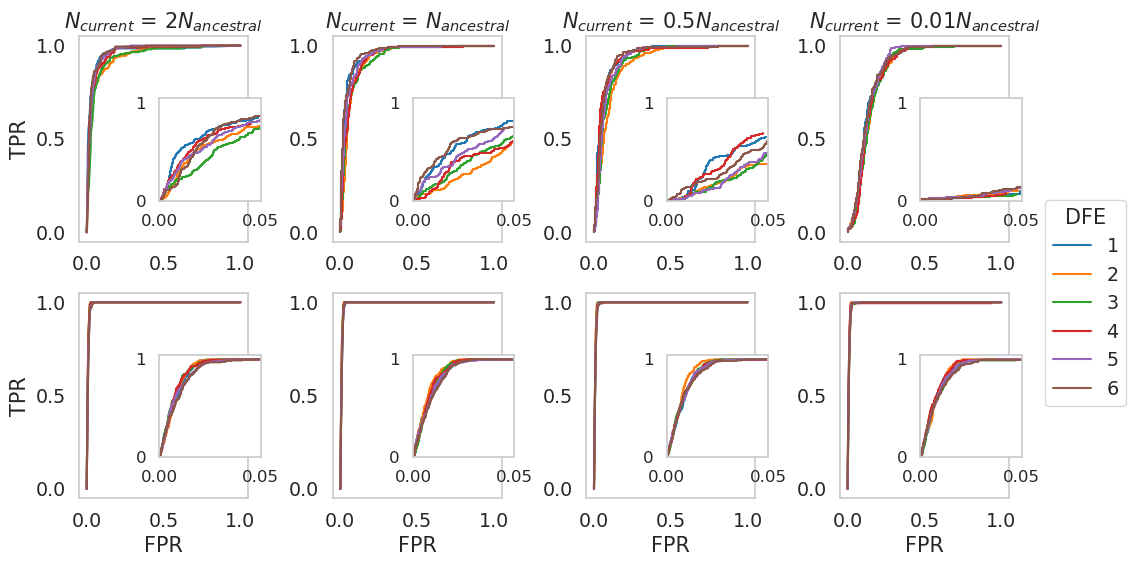

In [157]:
maxRep = 201
winSize = 100
chr_len=85005
cols = ['tab:blue',
'tab:orange',
'tab:green',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan']

titles = [r'$N_{current}$ = 2$N_{ancestral}$', r'$N_{current}$ = $N_{ancestral}$', r'$N_{current}$ = 0.5$N_{ancestral}$', r'$N_{current}$ = 0.01$N_{ancestral}$']
demog='stationary'
rr='variable'
mu='fixed'
bp_pos = 40342
demogs = [20000, 10000, 5000, 100]
sns.set(rc={'figure.figsize':(12,6),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
fig, axes = plt.subplots(2,4)
for d, ax in enumerate(axes.flat):
    left, bottom, width, height = [0.475, 0.2, 0.6, 0.5]
    ax2 = ax.inset_axes([left, bottom, width, height])
    ax2.xaxis.set_tick_params(labelsize=12)
    ax2.yaxis.set_tick_params(labelsize=12)
    ax2.margins(x=0, y=0)
    if(d<=3):
        for DFE in range(1,7):
            rdf = pd.DataFrame()
            for rep in range(1, maxRep):
                if(demogs[d] != 10000):
                    try:
                        df = pd.read_csv(r"/home/vivak/balancing_selection/demog/B2/" + str(demogs[d]) + '_rr_' + rr + '_mu_' + mu + '_hSap_DFE' + str(DFE) + '_rep' + str(rep) + '_75N.B2',
                                         sep='\t', header=0)
                        df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)], labels=[x for x in range(1, chr_len, winSize)])
                        df['bp'] = np.where(df.physPos == bp_pos, 1, 0)
                        df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
                        df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
                        df = pd.merge(df1,df2, left_index=True, right_index=True)
                        df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
                        df['bp'] = np.where(df.bp > 1, 1, df.bp)
                        rdf = pd.concat([rdf, df])
                    except Exception:
                        pass

                else:
                    try:
                        df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/BM_inputFiles/results/stationary/" + 
                                         "rr_" + rr + "_mu_" + mu + "/demog_DFE/100/hSap_DFE" + str(DFE) + "_rep" + str(rep) + "_75N.B2", sep='\t', header=0)
                        df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)], labels=[x for x in range(1, chr_len, winSize)])
                        df['bp'] = np.where(df.physPos == bp_pos, 1, 0)
                        df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
                        df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
                        df = pd.merge(df1,df2, left_index=True, right_index=True)
                        df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
                        df['bp'] = np.where(df.bp > 1, 1, df.bp)
                        rdf = pd.concat([rdf, df])
                    except Exception:
                        pass


            y = rdf.bp
            scores = rdf.CLR
            fpr, tpr, thresholds = metrics.roc_curve(y, scores)
            tdf = pd.DataFrame([fpr, tpr]).T
            #print("Empirical p<=0.05: " + str(tdf[tdf[0]<=0.05][1].max()))
            ax.plot(fpr, tpr, c = cols[DFE-1])
            roc_df = pd.DataFrame([fpr, tpr]).T
            roc_df.columns = [0,1]
            roc_df = roc_df[(roc_df[0]>=0) & (roc_df[0]<0.05)]
            fpr1 = roc_df[0]
            tpr1 = roc_df[1]
            ax2.plot(fpr1, tpr1, c=cols[DFE-1])
            
            ax.set_title(titles[d])
            if(d==0):
                ax.set_ylabel('TPR')
        ax.set_yticks([0, 0.5, 1])
        ax.set_xticks([0, 0.5, 1])
        ax2.set_xticks([0, 0.05])
        ax2.set_yticks([0, 1])
        ax2.set_ylim([0,1.05])
            

    else:
        for DFE in range(1,7):
            rdf = pd.DataFrame()
            for rep in range(1, maxRep):
                if(demogs[d-4] != 10000):
                    df = pd.read_csv(r'/home/vivak/balancing_selection/demog/iHS/' + str(demogs[d-4]) + '_rr_' + rr + '_mu_' + mu + '_hSap_DFE' + str(DFE) + '_rep' + str(rep) + '_0.01N.ihs.out',
                                    names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')
                else:
                    df = pd.read_csv(r'/home/vivak/balancing_selection/scripts/ihs/output/stationary/rr_' + rr + '_mu_' + mu + '/demog_DFE/100/hSap_DFE' + str(DFE) + '_rep' + str(rep) + '_0.01N.ihs.out',
                        names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')

                df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                                  labels=[x for x in range(1, chr_len, winSize)])
                df['bp'] = np.where(df.pos == bp_pos, 1, 0)
                df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
                df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
                df = pd.merge(df1,df2, left_index=True, right_index=True)
                df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
                df['bp'] = np.where(df.bp > 1, 1, df.bp)
                rdf = pd.concat([rdf, df])

            y = rdf.bp
            scores = rdf.ihs
            fpr, tpr, thresholds = metrics.roc_curve(y, scores)
            tdf = pd.DataFrame([fpr, tpr]).T
            #print(str(tdf[tdf[0]<=0.05][1].max()))
            ax.plot(fpr, tpr, label=DFE, c=cols[DFE-1])
            
            roc_df = pd.DataFrame([fpr, tpr]).T
            roc_df.columns = [0,1]
            roc_df = roc_df[(roc_df[0]>=0) & (roc_df[0]<0.05)]
            fpr1 = roc_df[0]
            tpr1 = roc_df[1]
            ax2.plot(fpr1, tpr1, c=cols[DFE-1])

            
        if(d==7):
            ax.legend(bbox_to_anchor=(1.75, 1.5), title='DFE')
        ax.set_xlabel('FPR')
        ax.set_yticks([0, 0.5, 1])
        ax.set_xticks([0, 0.5, 1])
        if(d==4):
            ax.set_ylabel('TPR')
        ax2.set_xticks([0, 0.05])
        ax2.set_yticks([0, 1])
        ax2.set_ylim([0,1.05])

plt.subplots_adjust(wspace=0.5, hspace=0.25)

plt.savefig('/home/vivak/balancing_selection/plots/ROC_DFE_demog_rr_' + rr + '_mu_' + mu + '.tiff', format='tiff', dpi=300, bbox_inches='tight')
plt.savefig('/home/vivak/balancing_selection/plots/ROC_DFE_demog_rr_' + rr + '_mu_' + mu + '.pdf', format='pdf', dpi=600, bbox_inches='tight')

In [28]:
rates = ['rr_fixed_mu_variable', 'rr_variable_mu_fixed', 'rr_variable_mu_variable']

for rate in rates:
    wlim = 84
    ####PLOT SUMMARY STATS FOR A SINGLE SCENARIO####
    sns.set(rc={'figure.figsize':(16, 12),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.5)

    lst = [1,5,9,13]
    ylabs = [r'$\pi$', r"Tajima's $D$", r"haplotype diversity", r"$D'$"]
    ylims = [[0, 15], [-1.5,5], [0.25,1], [-0.75, 1]]
    titles = [r'$N_{current}$ = 2$N_{ancestral}$', r'$N_{current}$ = $N_{ancestral}$', r'$N_{current}$ = 0.5$N_{ancestral}$', r'$N_{current}$ = 0.01$N_{ancestral}$']
    for d, demog in enumerate([20000, 10000, 5000, 100]):
        df_list = []
        for DFE in range(1, 7):
            df1 = pd.DataFrame()
            for rep in range(1, 201):
                if(demog != 10000):
                    try:
                        tdf = pd.read_csv(r"/home/vivak/balancing_selection/demog/B2/" + str(demog) + '_'+rate+'_hSap_DFE' + str(DFE) + '_rep' + str(rep) + '_75N.stats',
                                             sep='\t', header=0)
                        df1 = pd.concat([df1, tdf])
                    except Exception:
                        pass
                else:
                    try:
                        tdf = df = pd.read_csv(r"/home/vivak/balancing_selection/summary_stats/stationary/" + 
                                                 rate + '/demog_DFE/100/hSap_DFE' + str(DFE) + "_rep" + str(rep) + "_75N.stats", sep='\t', header=0)
                        df1 = pd.concat([df1, tdf])
                    except Exception:
                        pass

            l = [tdf.window]
            for stat in ('thetapi', 'tajimasd', 'meanrsq', 'numpoly', 'numsingletons', 'nhaps', 'divergence', 'hapdiv', 'meanDprime'):
                l.append(df1.groupby('window')[stat].mean())

            df1 = pd.DataFrame(l).T
            df1 = df1[df1.window<=wlim] 
            df_list.append(df1)

        for a, stat in enumerate(['thetapi', 'tajimasd', 'hapdiv', 'meanDprime']):
            plt.subplot(4,4,a+lst[d])
            for b, df in enumerate(df_list):
                plt.plot(df[stat], label= str(b+1))   
            plt.axvline(39, color='y', linestyle='--', alpha=0.75)
            plt.axvline(40, color='y', linestyle='--', alpha=0.75)
            plt.fill_betweenx([-5, 150], [39], [40], alpha=0.25, color='y')
            plt.ylim([ylims[a][0], ylims[a][1]])
            if(demog==100):
                plt.xlabel('position (kbp)')
            if((a==3) & (demog==10000)):
                plt.legend(bbox_to_anchor=(1, 0.5), title='DFE')
            if(demog==20000):
                plt.title(ylabs[a])
            if(stat=='thetapi'):
                plt.text(s = titles[d], x=-120, y=7.5)

        plt.margins(x=0)

    # # #Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.savefig('/home/vivak/balancing_selection/plots/DFE_demog_'+rate+'.pdf', format='pdf', dpi=600, bbox_inches='tight')
    plt.savefig('/home/vivak/balancing_selection/plots/DFE_demog_'+rate+'.tiff', format='tiff', dpi=300, bbox_inches='tight')
    plt.close()

/home/vivak/mambaforge-pypy3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/vivak/mambaforge-pypy3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/vivak/mambaforge-pypy3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


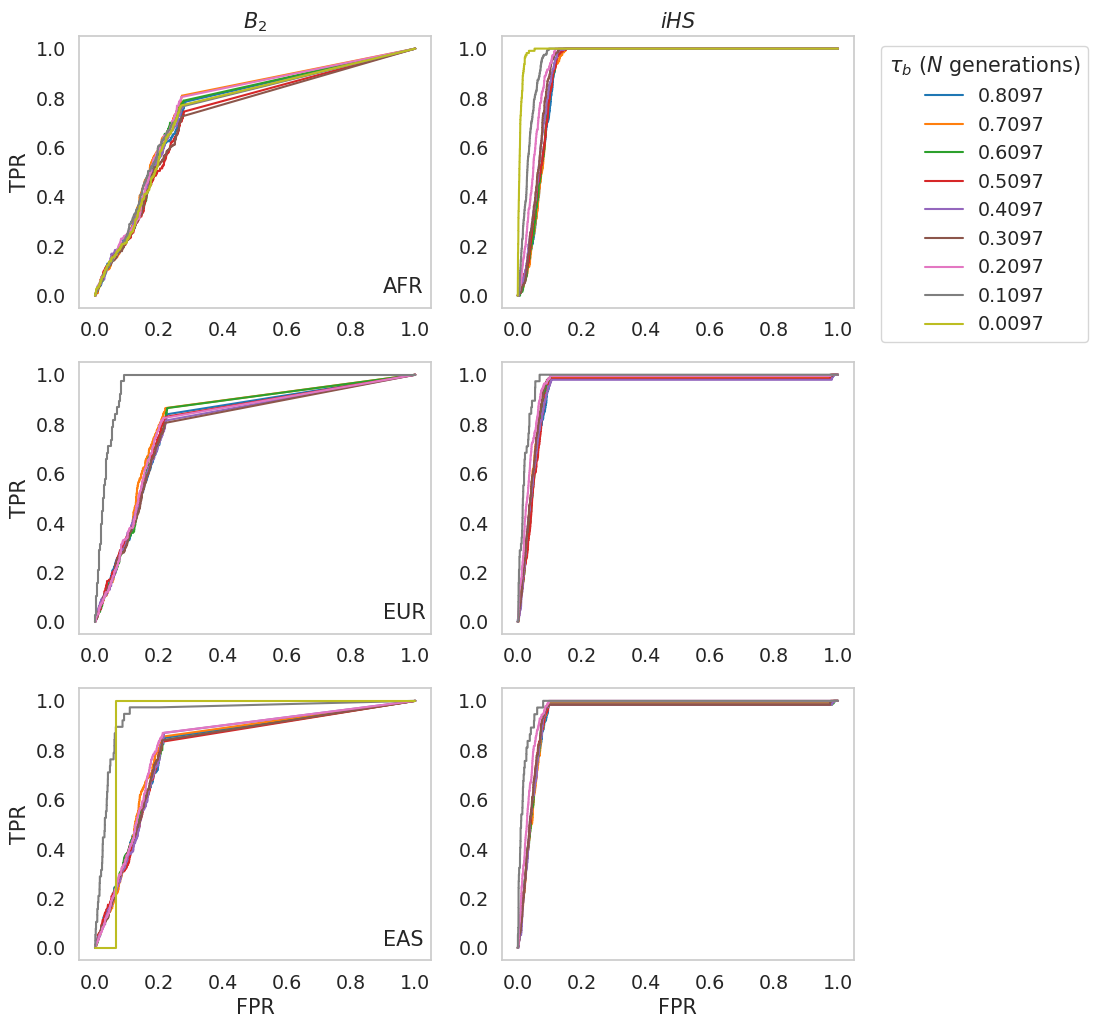

In [30]:
maxRep = 201
winSize = 100

cols = ['tab:blue',
'tab:orange',
'tab:green',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan']

bp_pos = 40342
chr_len = 85005

sns.set(rc={'figure.figsize':(10,12),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
for p,pop in enumerate(['AFR', 'EUR', 'EAS']):
    sp = (p*2) + 1
    plt.subplot(3,2,sp)
    for c,N in enumerate([73105, 73836, 74567,75298, 76029, 76760, 77491, 78222, 78953]):
        rdf = pd.DataFrame()
        for rep in range(1, maxRep):
            try:
                df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/BM_inputFiles/results/gravel/"+pop+"_rep" + str(rep) +"_" + str(N) + "_AFR" + "_0.1.B2", sep='\t', header=0)

                df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)],
                                  labels=[x for x in range(1, chr_len, winSize)])
                df['bp'] = np.where(df.physPos == bp_pos, 1, 0)
                df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
                df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
                df = pd.merge(df1,df2, left_index=True, right_index=True)
                df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
                df['bp'] = np.where(df.bp > 1, 1, df.bp)
                rdf = pd.concat([rdf, df])
            except Exception:
                pass

        y = rdf.bp
        scores = rdf.CLR
        fpr, tpr, thresholds = metrics.roc_curve(y, scores)
        tdf = pd.DataFrame([fpr, tpr]).T
        plt.plot(fpr, tpr, label=str(np.round((79024 - N) / 7310, 4)), c = cols[c])
    if(pop=='AFR'):
        plt.title('$B_2$')
    elif(pop=='EAS'):
        plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.text(s=pop, x=0.9, y=0.01)

    plt.subplot(3,2,sp+1)
    for c,N in enumerate([73105, 73836, 74567,75298, 76029, 76760, 77491, 78222, 78953]):
        rdf = pd.DataFrame()
        for rep in range(1, maxRep):
            df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/ihs/output/gravel/"+pop+"_rep" + str(rep) +"_" + str(N) + "_AFR" + '_0.1.ihs.out',
                            names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')

            df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                              labels=[x for x in range(1, chr_len, winSize)])
            df['bp'] = np.where(df.pos == bp_pos, 1, 0)
            df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
            df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
            df = pd.merge(df1,df2, left_index=True, right_index=True)
            df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
            df['bp'] = np.where(df.bp > 1, 1, df.bp)
            rdf = pd.concat([rdf, df])

        y = rdf.bp
        scores = rdf.ihs
        fpr, tpr, thresholds = metrics.roc_curve(y, scores)
        tdf = pd.DataFrame([fpr, tpr]).T
        plt.plot(fpr, tpr, label=str(np.round((79024 - N) / 7310, 4)), c=cols[c])
    if(pop=='AFR'):
        plt.title('$iHS$')
        plt.legend(bbox_to_anchor=(1.05, 1), title=r'$\tau_b$' + ' ($N$ generations)')
    elif(pop=='EAS'):
        plt.xlabel('FPR')

plt.savefig('/home/vivak/balancing_selection/plots/gravel_AFR.tiff', format='tiff', dpi=300, bbox_inches='tight')

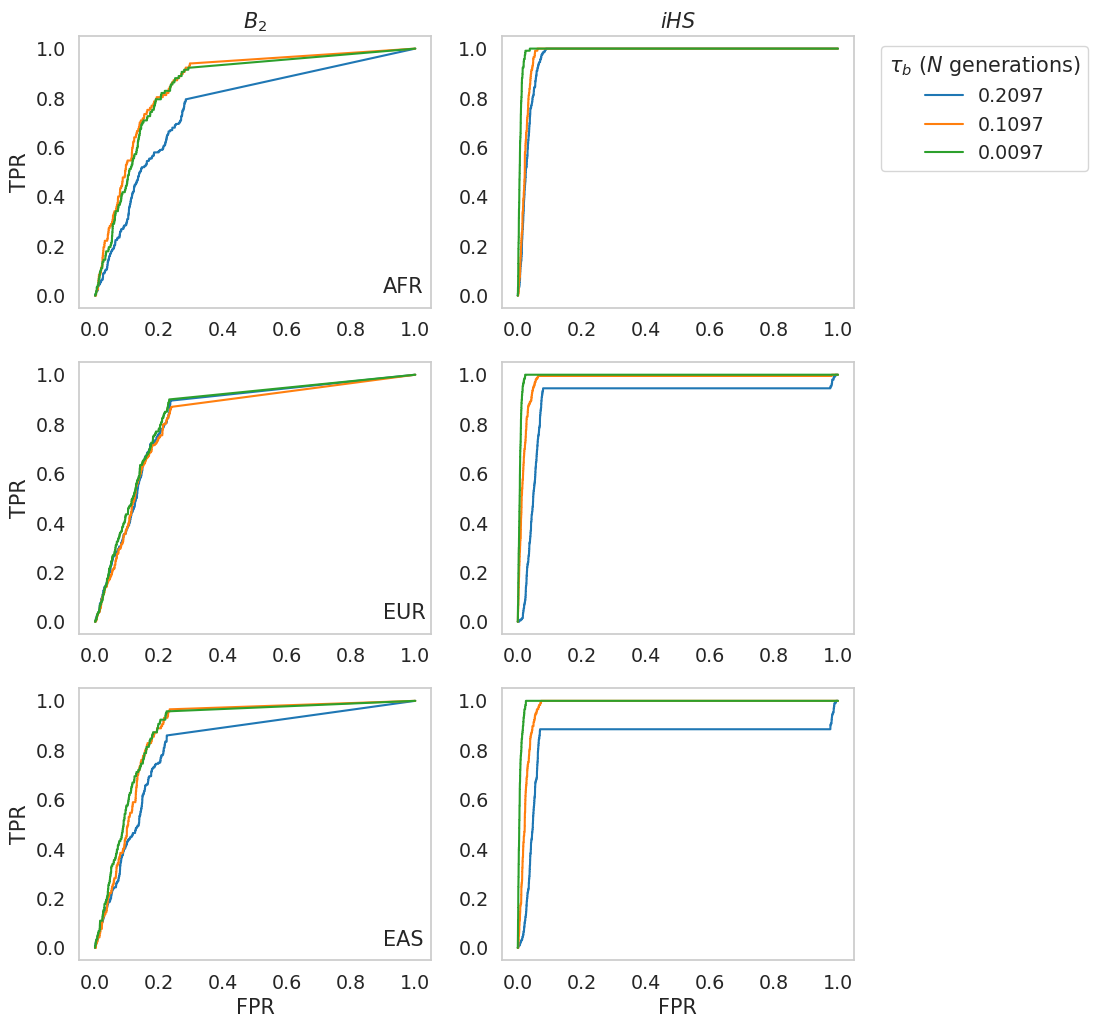

In [31]:
maxRep = 201
winSize = 100

cols = ['tab:blue',
'tab:orange',
'tab:green',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan']

bp_pos = 40342
chr_len = 85005

sns.set(rc={'figure.figsize':(10,12),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
for p,pop in enumerate(['AFR', 'EUR', 'EAS']):
    sp = (p*2) + 1
    plt.subplot(3,2,sp)
    for c,N in enumerate([77491, 78222, 78953]):
        rdf = pd.DataFrame()
        for rep in range(1, maxRep):
            try:
                df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/BM_inputFiles/results/gravel/"+pop+"_rep" + str(rep) +"_" + str(N) + "_EUR" + ".B2", sep='\t', header=0)

                df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)],
                                  labels=[x for x in range(1, chr_len, winSize)])
                df['bp'] = np.where(df.physPos == bp_pos, 1, 0)
                df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
                df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
                df = pd.merge(df1,df2, left_index=True, right_index=True)
                df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
                df['bp'] = np.where(df.bp > 1, 1, df.bp)
                rdf = pd.concat([rdf, df])
            except Exception:
                pass

        y = rdf.bp
        scores = rdf.CLR
        fpr, tpr, thresholds = metrics.roc_curve(y, scores)
        tdf = pd.DataFrame([fpr, tpr]).T
        plt.plot(fpr, tpr, label=str(np.round((79024 - N) / 7310, 4)), c = cols[c])
    if(pop=='AFR'):
        plt.title('$B_2$')
    elif(pop=='EAS'):
        plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.text(s=pop, x=0.9, y=0.01)

    plt.subplot(3,2,sp+1)
    for c,N in enumerate([77491, 78222, 78953]):
        rdf = pd.DataFrame()
        for rep in range(1, maxRep):
            df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/ihs/output/gravel/"+pop+"_rep" + str(rep) +"_" + str(N) + "_EUR" + '.ihs.out',
                            names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')

            df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                              labels=[x for x in range(1, chr_len, winSize)])
            df['bp'] = np.where(df.pos == bp_pos, 1, 0)
            df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
            df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
            df = pd.merge(df1,df2, left_index=True, right_index=True)
            df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
            df['bp'] = np.where(df.bp > 1, 1, df.bp)
            rdf = pd.concat([rdf, df])

        y = rdf.bp
        scores = rdf.ihs
        fpr, tpr, thresholds = metrics.roc_curve(y, scores)
        tdf = pd.DataFrame([fpr, tpr]).T
        plt.plot(fpr, tpr, label=str(np.round((79024 - N) / 7310, 4)), c=cols[c])
    if(pop=='AFR'):
        plt.title('$iHS$')
        plt.legend(bbox_to_anchor=(1.05, 1), title=r'$\tau_b$' + ' ($N$ generations)')
    elif(pop=='EAS'):
        plt.xlabel('FPR')

plt.savefig('/home/vivak/balancing_selection/plots/gravel_EUR.tiff', format='tiff', dpi=300, bbox_inches='tight')

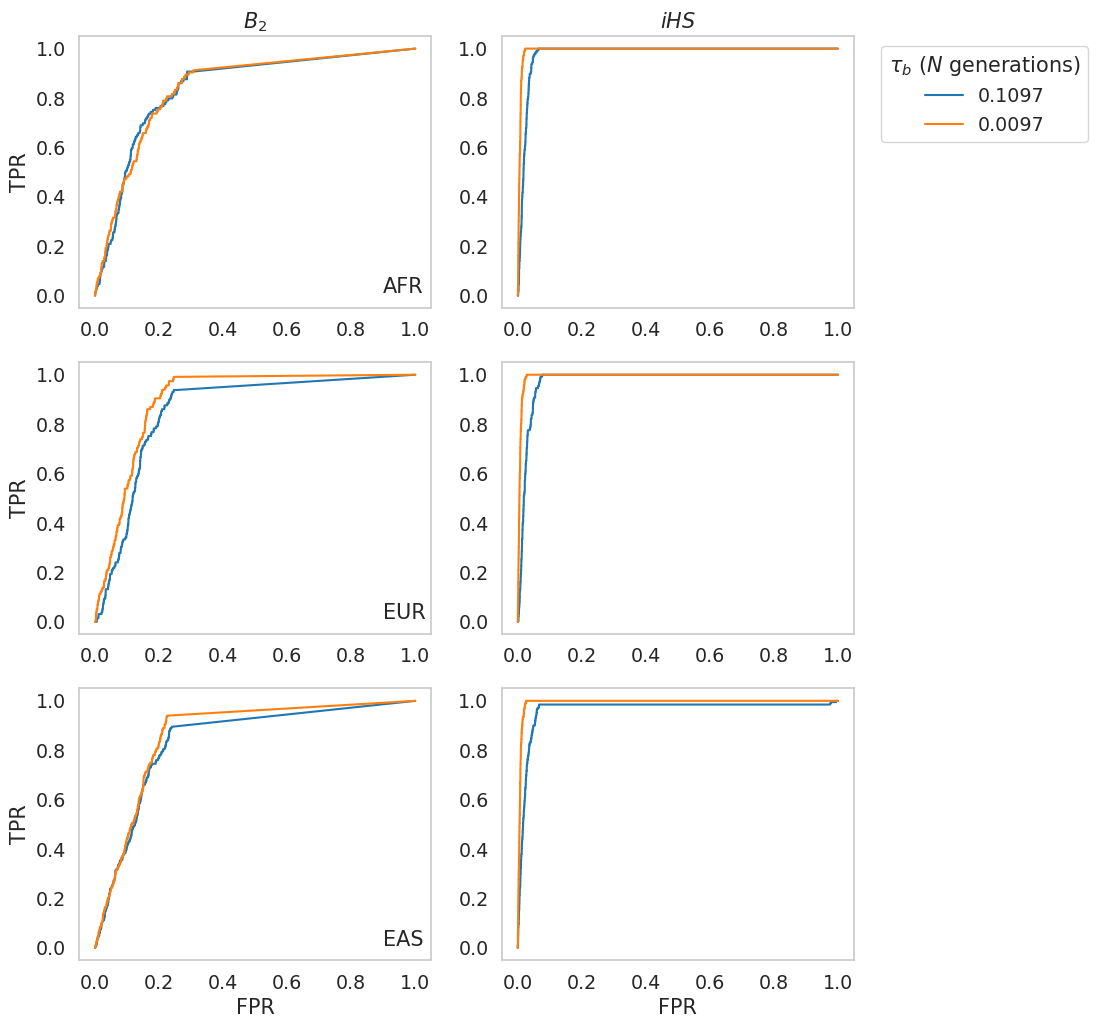

In [32]:
maxRep = 201
winSize = 100

cols = ['tab:blue',
'tab:orange',
'tab:green',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan']

bp_pos = 40342
chr_len = 85005

sns.set(rc={'figure.figsize':(10,12),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
for p,pop in enumerate(['AFR', 'EUR', 'EAS']):
    sp = (p*2) + 1
    plt.subplot(3,2,sp)
    for c,N in enumerate([78222, 78953]):
        rdf = pd.DataFrame()
        for rep in range(1, maxRep):
            try:
                df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/BM_inputFiles/results/gravel/"+pop+"_rep" + str(rep) +"_" + str(N) + "_EAS" + ".B2", sep='\t', header=0)

                df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)],
                                  labels=[x for x in range(1, chr_len, winSize)])
                df['bp'] = np.where(df.physPos == bp_pos, 1, 0)
                df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
                df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
                df = pd.merge(df1,df2, left_index=True, right_index=True)
                df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
                df['bp'] = np.where(df.bp > 1, 1, df.bp)
                rdf = pd.concat([rdf, df])
            except Exception:
                pass

        y = rdf.bp
        scores = rdf.CLR
        fpr, tpr, thresholds = metrics.roc_curve(y, scores)
        tdf = pd.DataFrame([fpr, tpr]).T
        plt.plot(fpr, tpr, label=str(np.round((79024 - N) / 7310, 4)), c = cols[c])
    if(pop=='AFR'):
        plt.title('$B_2$')
    elif(pop=='EAS'):
        plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.text(s=pop, x=0.9, y=0.01)

    plt.subplot(3,2,sp+1)
    for c,N in enumerate([78222, 78953]):
        rdf = pd.DataFrame()
        for rep in range(1, maxRep):
            df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/ihs/output/gravel/"+pop+"_rep" + str(rep) +"_" + str(N) + "_EAS" + '.ihs.out',
                            names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')

            df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                              labels=[x for x in range(1, chr_len, winSize)])
            df['bp'] = np.where(df.pos == bp_pos, 1, 0)
            df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
            df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
            df = pd.merge(df1,df2, left_index=True, right_index=True)
            df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
            df['bp'] = np.where(df.bp > 1, 1, df.bp)
            rdf = pd.concat([rdf, df])

        y = rdf.bp
        scores = rdf.ihs
        fpr, tpr, thresholds = metrics.roc_curve(y, scores)
        tdf = pd.DataFrame([fpr, tpr]).T
        plt.plot(fpr, tpr, label=str(np.round((79024 - N) / 7310, 4)), c=cols[c])
    if(pop=='AFR'):
        plt.title('$iHS$')
        plt.legend(bbox_to_anchor=(1.05, 1), title=r'$\tau_b$' + ' ($N$ generations)')
    elif(pop=='EAS'):
        plt.xlabel('FPR')

plt.savefig('/home/vivak/balancing_selection/plots/gravel_EAS.tiff', format='tiff', dpi=300, bbox_inches='tight')

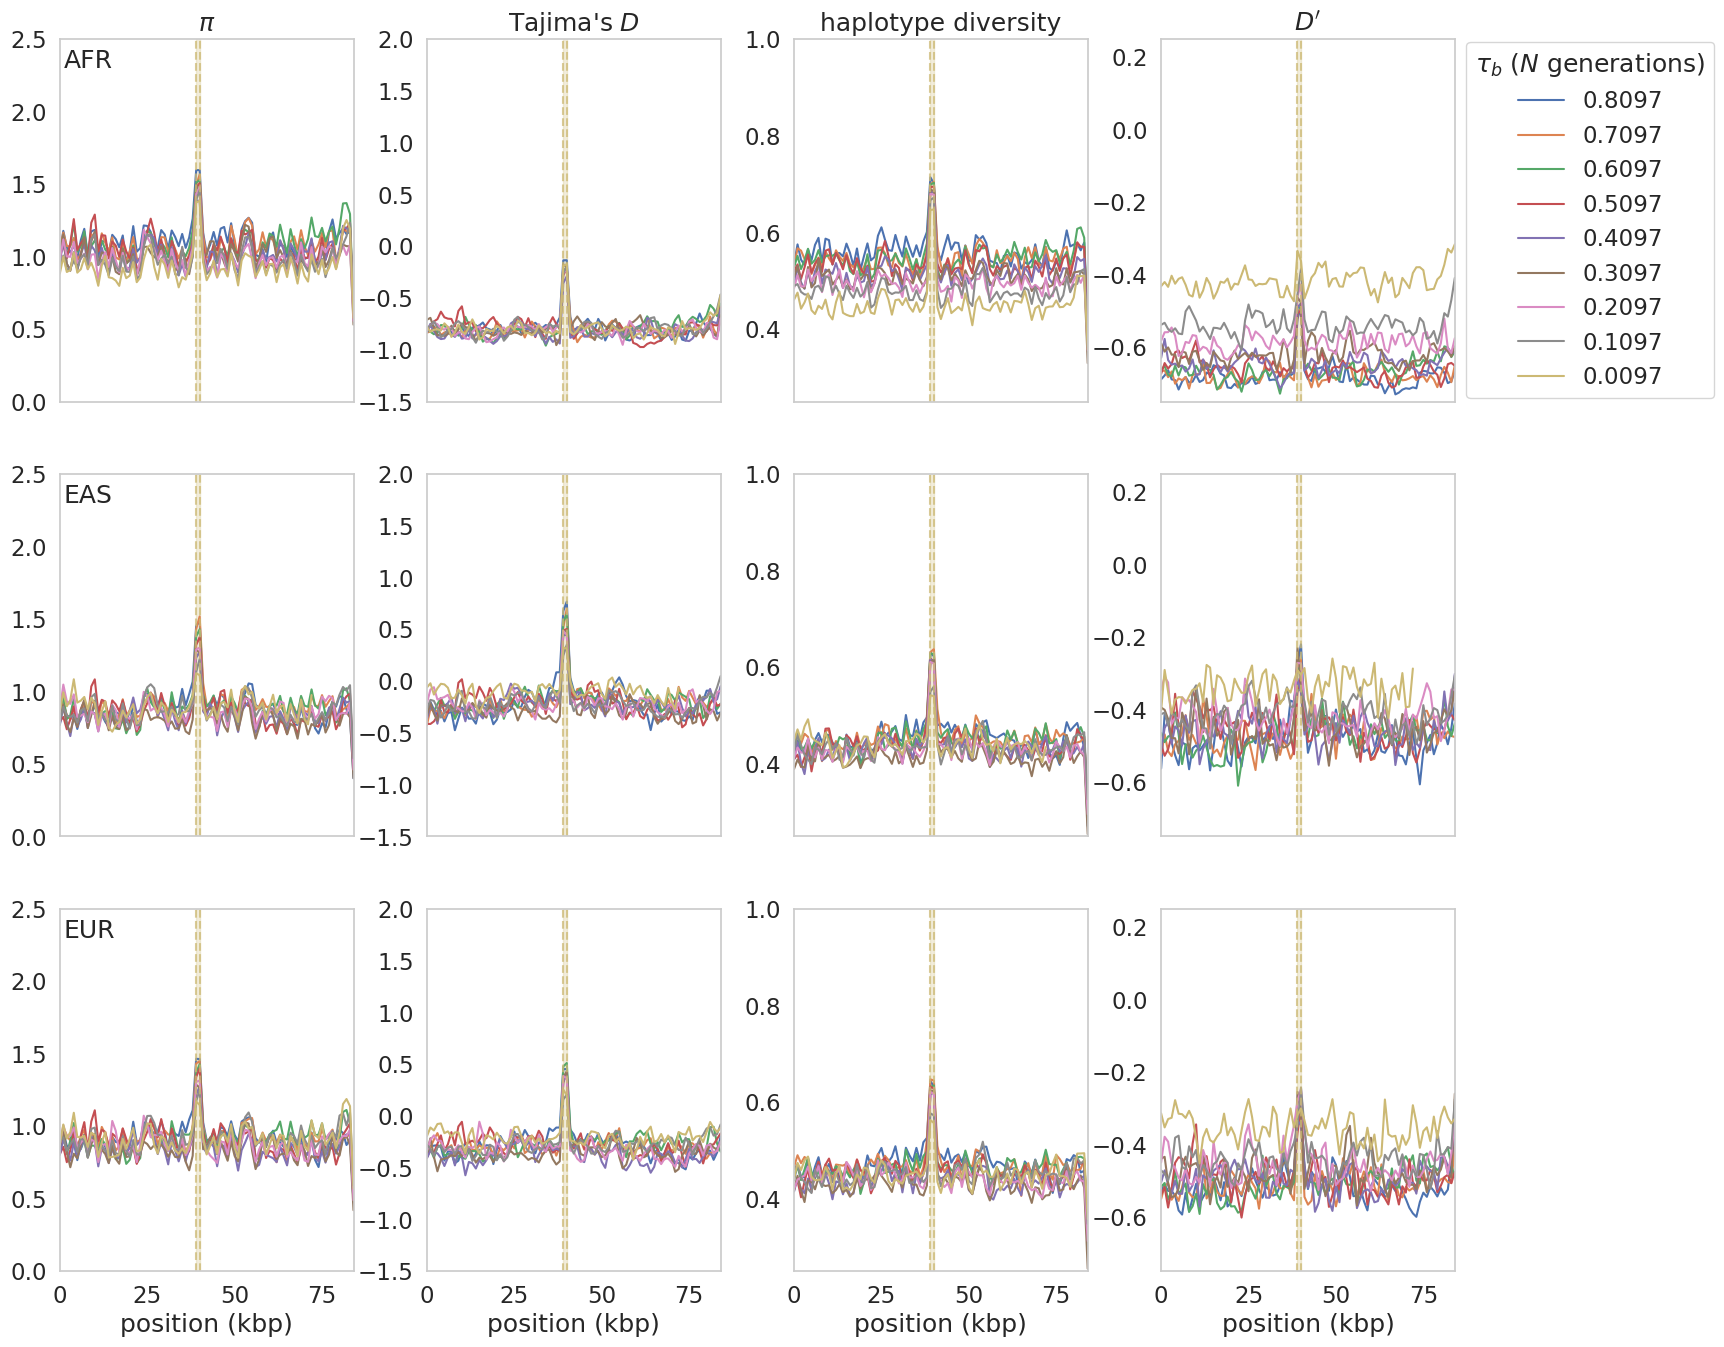

In [70]:
wlim = 84
####PLOT SUMMARY STATS FOR A SINGLE SCENARIO####
ylims = [[0, 2.5], [-1.5,2], [0.25,1], [-0.75, 0.25]]
lst = [1,5,9,13]
ylabs = [r'$\pi$', r"Tajima's $D$", r"haplotype diversity", r"$D'$"]
N_list = [73105, 73836, 74567,75298, 76029, 76760, 77491, 78222, 78953]
r_list = [1,5,9,13]
sns.set(rc={'figure.figsize':(18, 16),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.5)

for p, pop in enumerate(['AFR','EAS','EUR']):
    df_list = []
    for N in N_list:
        df1 = pd.DataFrame()
        for rep in range(1, 201):
            try:
                tdf = pd.read_csv(r"/home/vivak/balancing_selection/summary_stats/gravel/"+ pop + "_rep" + str(rep) + "_"  + str(N) + "_AFR"
                                  '.stats', sep='\t',header=0)
                df1 = pd.concat([df1, tdf])


            except Exception:
                pass

        l = [tdf.window]
        for stat in ('thetapi', 'tajimasd', 'meanrsq', 'numpoly', 'numsingletons', 'nhaps', 'divergence', 'hapdiv', 'meanDprime'):
            l.append(df1.groupby('window')[stat].mean())

        df1 = pd.DataFrame(l).T
        df1 = df1[df1.window<=wlim] 
        df_list.append(df1)

    for a, stat in enumerate(['thetapi', 'tajimasd', 'hapdiv', 'meanDprime']):
        plt.subplot(3,4,r_list[p]+a)
        for b, df in enumerate(df_list):
            plt.plot(df[stat], label=str(np.round((79024 - N_list[b]) / 7310, 4)))   
        plt.axvline(39, color='y', linestyle='--', alpha=0.75)
        plt.axvline(40, color='y', linestyle='--', alpha=0.75)
        plt.fill_betweenx([-5, 150], [39], [40], alpha=0.25, color='y')
        plt.ylim([ylims[a][0], ylims[a][1]])
        if(r_list[p]+a>=9):
            plt.xlabel('position (kbp)')
        else:
            plt.xticks([])
        if((r_list[p]+a==4) & (pop=='AFR')):
            plt.legend(bbox_to_anchor=(1, 1.025), title=r'$\tau_b$' + ' ($N$ generations)')
        if(r_list[p]+a<=4):
            plt.title(ylabs[a])
            
        if(stat=='thetapi'):
            plt.text(s=pop, x=1, y=2.3)

        plt.margins(x=0)

# #Adjust spacing between subplots
plt.subplots_adjust(wspace=0.25, hspace=0.2)
plt.savefig('/home/vivak/balancing_selection/plots/' + 'gravel_stats_AFR.tiff', format='tiff', dpi=300, bbox_inches='tight')
#plt.close()

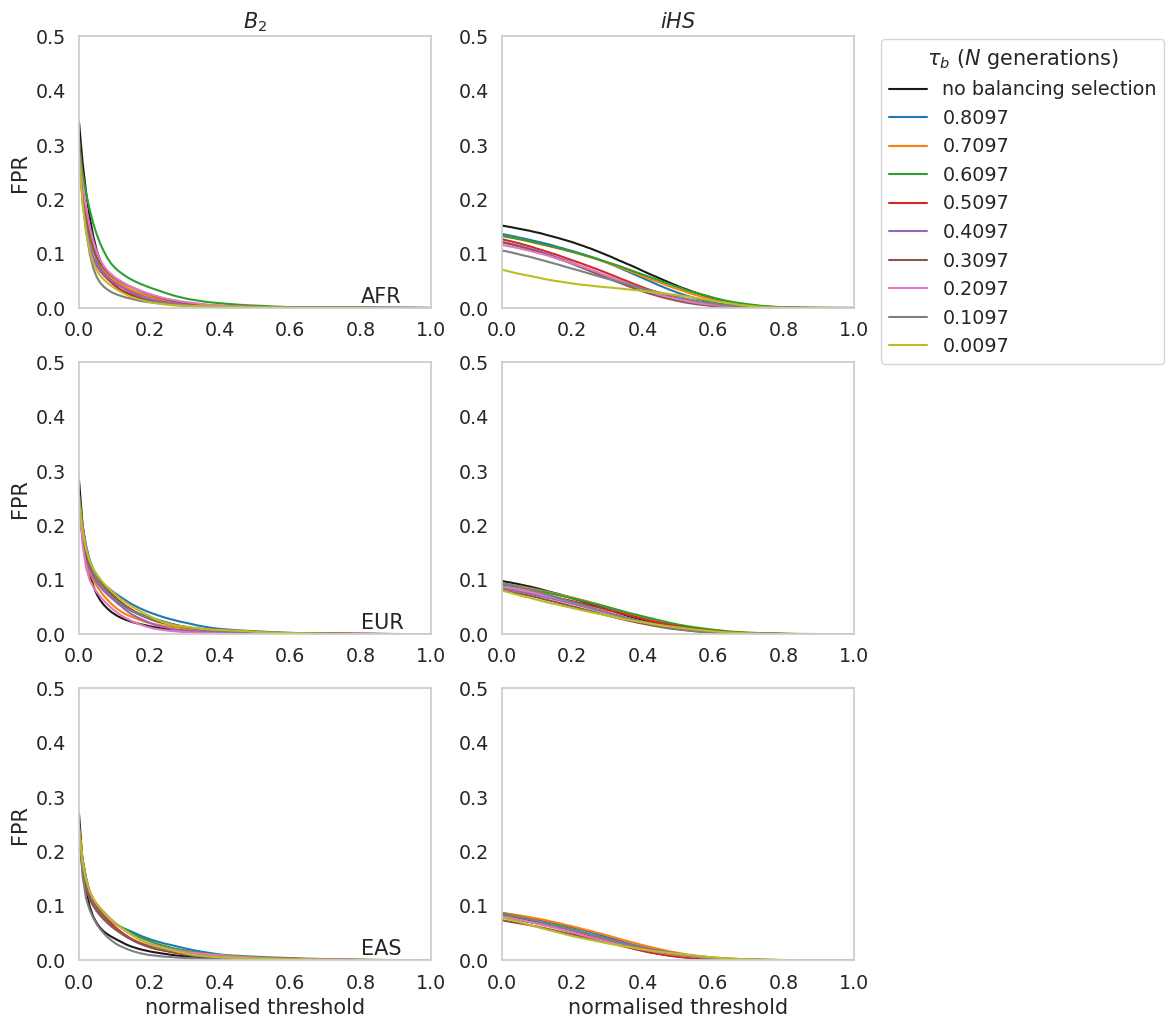

In [73]:
cols = ['tab:blue',
'tab:orange',
'tab:green',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan']

chr_len=85005
winSize=100
N = 73105
bp_pos = 40342

sns.set(rc={'figure.figsize':(10,12),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)

##############AFR##############
pop='AFR'
plt.subplot(3,2,1)
rdf = pd.DataFrame()
rdf2 = pd.DataFrame()
for rep in range(1, 201):
    df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/BM_inputFiles/results/gravel_null/"+pop+"_rep" + str(rep) +"_null.B2", sep='\t', header=0)

    df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)],
                      labels=[x for x in range(1, chr_len, winSize)])
    df['bp'] = 0
    df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
    df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
    df = pd.merge(df1,df2, left_index=True, right_index=True)
    df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
    df['bp'] = np.where(df.bp > 1, 1, df.bp)
    rdf = pd.concat([rdf,df])
    
thresholds = np.linspace(0, rdf.CLR.max(), 100)
fp = [len(rdf[rdf.CLR > x]) for x in thresholds]
tn = [len(rdf[rdf.CLR <= x]) for x in thresholds]
ndf = pd.DataFrame([thresholds,fp,tn]).T
ndf.columns = ['threshold','fp','tn']
ndf['fpr'] = ndf.fp/(ndf.fp+ndf.tn)
ndf['threshold_normalised'] = (ndf.threshold - ndf.threshold.min()) / (ndf.threshold.max() - ndf.threshold.min())
plt.plot(ndf.threshold_normalised, ndf.fpr, label='no balancing selection', c='k')


for c,N in enumerate([73105, 73836, 74567,75298, 76029, 76760, 77491, 78222, 78953]):
    rdf2 = pd.DataFrame()
    for rep in range(1, 201):
        try:
            df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/BM_inputFiles/results/gravel/"+pop+"_rep" + str(rep) +"_" + str(N) + "_AFR" + ".B2", sep='\t', header=0)

            df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)],
                              labels=[x for x in range(1, chr_len, winSize)])
            df['bp'] = np.where(df.physPos == bp_pos, 1, 0)
            df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
            df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
            df = pd.merge(df1,df2, left_index=True, right_index=True)
            df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
            df['bp'] = np.where(df.bp > 1, 1, df.bp)
            rdf2 = pd.concat([rdf2, df])
        except Exception:
            pass


    thresholds = np.linspace(0, rdf2.CLR.max(), 100)
    fp = [len(rdf2[rdf2.CLR > x]) for x in thresholds]
    tn = [len(rdf2[rdf2.CLR <= x]) for x in thresholds]
    bdf = pd.DataFrame([thresholds,fp,tn]).T
    bdf.columns = ['threshold','fp','tn']
    bdf['fpr'] = bdf.fp/(bdf.fp+bdf.tn)
    bdf['threshold_normalised'] = (bdf.threshold - bdf.threshold.min()) / (bdf.threshold.max() - bdf.threshold.min())

    plt.plot(bdf.threshold_normalised, bdf.fpr, label=str(np.round((79024 - N) / 7310, 4)), c=cols[c])

plt.ylim([0,0.5])    
plt.ylabel('FPR')
plt.margins(0)
plt.text(s=pop, x=0.8, y=0.01)
plt.title('$B_2$')

plt.subplot(3,2,2)
rdf = pd.DataFrame()
rdf2 = pd.DataFrame()
for rep in range(1, 201):
    df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/ihs/output/gravel_null/"+pop+"_rep" + str(rep) +"_null.ihs.out", 
                     names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')

    df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                      labels=[x for x in range(1, chr_len, winSize)])
    df['bp'] = np.where(df.pos == bp_pos, 1, 0)
    df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
    df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
    df = pd.merge(df1,df2, left_index=True, right_index=True)
    df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
    df['bp'] = np.where(df.bp > 1, 1, df.bp)
    rdf = pd.concat([rdf, df])
    
thresholds = np.linspace(0, rdf.ihs.max(), 100)
fp = [len(rdf[rdf.ihs > x]) for x in thresholds]
tn = [len(rdf[rdf.ihs <= x]) for x in thresholds]
ndf = pd.DataFrame([thresholds,fp,tn]).T
ndf.columns = ['threshold','fp','tn']
ndf['fpr'] = ndf.fp/(ndf.fp+ndf.tn)
ndf['threshold_normalised'] = (ndf.threshold - ndf.threshold.min()) / (ndf.threshold.max() - ndf.threshold.min())
plt.plot(ndf.threshold_normalised, ndf.fpr, label='no balancing selection', c='k')


for c,N in enumerate([73105, 73836, 74567,75298, 76029, 76760, 77491, 78222, 78953]):
    rdf2 = pd.DataFrame()
    for rep in range(1, 201):
        try:
            df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/ihs/output/gravel/"+pop+"_rep" + str(rep) +"_" + str(N) + "_AFR" + ".ihs.out", 
                             names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')

            df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                              labels=[x for x in range(1, chr_len, winSize)])
            df['bp'] = np.where(df.pos == bp_pos, 1, 0)
            df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
            df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
            df = pd.merge(df1,df2, left_index=True, right_index=True)
            df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
            df['bp'] = np.where(df.bp > 1, 1, df.bp)
            rdf2 = pd.concat([rdf2, df])
        except Exception:
            pass


    thresholds = np.linspace(0, rdf2.ihs.max(), 100)
    fp = [len(rdf2[rdf2.ihs > x]) for x in thresholds]
    tn = [len(rdf2[rdf2.ihs <= x]) for x in thresholds]
    bdf = pd.DataFrame([thresholds,fp,tn]).T
    bdf.columns = ['threshold','fp','tn']
    bdf['fpr'] = bdf.fp/(bdf.fp+bdf.tn)
    bdf['threshold_normalised'] = (bdf.threshold - bdf.threshold.min()) / (bdf.threshold.max() - bdf.threshold.min())

    plt.plot(bdf.threshold_normalised, bdf.fpr, label=str(np.round((79024 - N) / 7310, 4)), c=cols[c])
    
plt.ylim([0,0.5])
plt.legend(bbox_to_anchor=(1.05, 1.025), title=r'$\tau_b$' + ' ($N$ generations)')
plt.margins(0)
plt.title('$iHS$')

#################EUR#################
pop='EUR'
plt.subplot(3,2,3)
rdf = pd.DataFrame()
rdf2 = pd.DataFrame()
for rep in range(1, 201):
    df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/BM_inputFiles/results/gravel_null/"+pop+"_rep" + str(rep) +"_null.B2", sep='\t', header=0)

    df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)],
                      labels=[x for x in range(1, chr_len, winSize)])
    df['bp'] = 0
    df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
    df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
    df = pd.merge(df1,df2, left_index=True, right_index=True)
    df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
    df['bp'] = np.where(df.bp > 1, 1, df.bp)
    rdf = pd.concat([rdf,df])
    
thresholds = np.linspace(0, rdf.CLR.max(), 100)
fp = [len(rdf[rdf.CLR > x]) for x in thresholds]
tn = [len(rdf[rdf.CLR <= x]) for x in thresholds]
ndf = pd.DataFrame([thresholds,fp,tn]).T
ndf.columns = ['threshold','fp','tn']
ndf['fpr'] = ndf.fp/(ndf.fp+ndf.tn)
ndf['threshold_normalised'] = (ndf.threshold - ndf.threshold.min()) / (ndf.threshold.max() - ndf.threshold.min())
plt.plot(ndf.threshold_normalised, ndf.fpr, label='no balancing selection', c='k')


for c,N in enumerate([73105, 73836, 74567,75298, 76029, 76760, 77491, 78222, 78953]):
    rdf2 = pd.DataFrame()
    for rep in range(1, 201):
        try:
            df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/BM_inputFiles/results/gravel/"+pop+"_rep" + str(rep) +"_" + str(N) + "_AFR" + ".B2", sep='\t', header=0)

            df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)],
                              labels=[x for x in range(1, chr_len, winSize)])
            df['bp'] = np.where(df.physPos == bp_pos, 1, 0)
            df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
            df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
            df = pd.merge(df1,df2, left_index=True, right_index=True)
            df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
            df['bp'] = np.where(df.bp > 1, 1, df.bp)
            rdf2 = pd.concat([rdf2, df])
        except Exception:
            pass


    thresholds = np.linspace(0, rdf2.CLR.max(), 100)
    fp = [len(rdf2[rdf2.CLR > x]) for x in thresholds]
    tn = [len(rdf2[rdf2.CLR <= x]) for x in thresholds]
    bdf = pd.DataFrame([thresholds,fp,tn]).T
    bdf.columns = ['threshold','fp','tn']
    bdf['fpr'] = bdf.fp/(bdf.fp+bdf.tn)
    bdf['threshold_normalised'] = (bdf.threshold - bdf.threshold.min()) / (bdf.threshold.max() - bdf.threshold.min())

    plt.plot(bdf.threshold_normalised, bdf.fpr, label=str(np.round((79024 - N) / 7310, 4)), c=cols[c])

plt.ylim([0,0.5])    
plt.ylabel('FPR')
plt.margins(0)
plt.text(s=pop, x=0.8, y=0.01)

plt.subplot(3,2,4)
rdf = pd.DataFrame()
rdf2 = pd.DataFrame()
for rep in range(1, 201):
    df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/ihs/output/gravel_null/"+pop+"_rep" + str(rep) +"_null.ihs.out", 
                     names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')

    df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                      labels=[x for x in range(1, chr_len, winSize)])
    df['bp'] = np.where(df.pos == bp_pos, 1, 0)
    df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
    df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
    df = pd.merge(df1,df2, left_index=True, right_index=True)
    df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
    df['bp'] = np.where(df.bp > 1, 1, df.bp)
    rdf = pd.concat([rdf, df])
    
thresholds = np.linspace(0, rdf.ihs.max(), 100)
fp = [len(rdf[rdf.ihs > x]) for x in thresholds]
tn = [len(rdf[rdf.ihs <= x]) for x in thresholds]
ndf = pd.DataFrame([thresholds,fp,tn]).T
ndf.columns = ['threshold','fp','tn']
ndf['fpr'] = ndf.fp/(ndf.fp+ndf.tn)
ndf['threshold_normalised'] = (ndf.threshold - ndf.threshold.min()) / (ndf.threshold.max() - ndf.threshold.min())
plt.plot(ndf.threshold_normalised, ndf.fpr, label='no balancing selection', c='k')


for c,N in enumerate([73105, 73836, 74567,75298, 76029, 76760, 77491, 78222, 78953]):
    rdf2 = pd.DataFrame()
    for rep in range(1, 201):
        try:
            df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/ihs/output/gravel/"+pop+"_rep" + str(rep) +"_" + str(N) + "_AFR" + ".ihs.out", 
                             names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')

            df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                              labels=[x for x in range(1, chr_len, winSize)])
            df['bp'] = np.where(df.pos == bp_pos, 1, 0)
            df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
            df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
            df = pd.merge(df1,df2, left_index=True, right_index=True)
            df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
            df['bp'] = np.where(df.bp > 1, 1, df.bp)
            rdf2 = pd.concat([rdf2, df])
        except Exception:
            pass


    thresholds = np.linspace(0, rdf2.ihs.max(), 100)
    fp = [len(rdf2[rdf2.ihs > x]) for x in thresholds]
    tn = [len(rdf2[rdf2.ihs <= x]) for x in thresholds]
    bdf = pd.DataFrame([thresholds,fp,tn]).T
    bdf.columns = ['threshold','fp','tn']
    bdf['fpr'] = bdf.fp/(bdf.fp+bdf.tn)
    bdf['threshold_normalised'] = (bdf.threshold - bdf.threshold.min()) / (bdf.threshold.max() - bdf.threshold.min())

    plt.plot(bdf.threshold_normalised, bdf.fpr, label=str(np.round((79024 - N) / 7310, 4)), c=cols[c])
    
plt.ylim([0,0.5])
plt.margins(0)



####################EAS###################
pop='EAS'
plt.subplot(3,2,5)
rdf = pd.DataFrame()
rdf2 = pd.DataFrame()
for rep in range(1, 201):
    df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/BM_inputFiles/results/gravel_null/"+pop+"_rep" + str(rep) +"_null.B2", sep='\t', header=0)

    df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)],
                      labels=[x for x in range(1, chr_len, winSize)])
    df['bp'] = 0
    df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
    df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
    df = pd.merge(df1,df2, left_index=True, right_index=True)
    df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
    df['bp'] = np.where(df.bp > 1, 1, df.bp)
    rdf = pd.concat([rdf,df])
    
thresholds = np.linspace(0, rdf.CLR.max(), 100)
fp = [len(rdf[rdf.CLR > x]) for x in thresholds]
tn = [len(rdf[rdf.CLR <= x]) for x in thresholds]
ndf = pd.DataFrame([thresholds,fp,tn]).T
ndf.columns = ['threshold','fp','tn']
ndf['fpr'] = ndf.fp/(ndf.fp+ndf.tn)
ndf['threshold_normalised'] = (ndf.threshold - ndf.threshold.min()) / (ndf.threshold.max() - ndf.threshold.min())
plt.plot(ndf.threshold_normalised, ndf.fpr, label='no balancing selection', c='k')


for c,N in enumerate([73105, 73836, 74567,75298, 76029, 76760, 77491, 78222, 78953]):
    rdf2 = pd.DataFrame()
    for rep in range(1, 201):
        try:
            df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/BM_inputFiles/results/gravel/"+pop+"_rep" + str(rep) +"_" + str(N) + "_AFR" + ".B2", sep='\t', header=0)

            df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)],
                              labels=[x for x in range(1, chr_len, winSize)])
            df['bp'] = np.where(df.physPos == bp_pos, 1, 0)
            df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
            df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
            df = pd.merge(df1,df2, left_index=True, right_index=True)
            df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
            df['bp'] = np.where(df.bp > 1, 1, df.bp)
            rdf2 = pd.concat([rdf2, df])
        except Exception:
            pass


    thresholds = np.linspace(0, rdf2.CLR.max(), 100)
    fp = [len(rdf2[rdf2.CLR > x]) for x in thresholds]
    tn = [len(rdf2[rdf2.CLR <= x]) for x in thresholds]
    bdf = pd.DataFrame([thresholds,fp,tn]).T
    bdf.columns = ['threshold','fp','tn']
    bdf['fpr'] = bdf.fp/(bdf.fp+bdf.tn)
    bdf['threshold_normalised'] = (bdf.threshold - bdf.threshold.min()) / (bdf.threshold.max() - bdf.threshold.min())

    plt.plot(bdf.threshold_normalised, bdf.fpr, label=str(np.round((79024 - N) / 7310, 4)), c=cols[c])

plt.ylim([0,0.5])    
plt.xlabel('normalised threshold')
plt.ylabel('FPR')
plt.margins(0)
plt.text(s=pop, x=0.8, y=0.01)

plt.subplot(3,2,6)
rdf = pd.DataFrame()
rdf2 = pd.DataFrame()
for rep in range(1, 201):
    df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/ihs/output/gravel_null/"+pop+"_rep" + str(rep) +"_null.ihs.out", 
                     names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')

    df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                      labels=[x for x in range(1, chr_len, winSize)])
    df['bp'] = np.where(df.pos == bp_pos, 1, 0)
    df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
    df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
    df = pd.merge(df1,df2, left_index=True, right_index=True)
    df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
    df['bp'] = np.where(df.bp > 1, 1, df.bp)
    rdf = pd.concat([rdf, df])
    
thresholds = np.linspace(0, rdf.ihs.max(), 100)
fp = [len(rdf[rdf.ihs > x]) for x in thresholds]
tn = [len(rdf[rdf.ihs <= x]) for x in thresholds]
ndf = pd.DataFrame([thresholds,fp,tn]).T
ndf.columns = ['threshold','fp','tn']
ndf['fpr'] = ndf.fp/(ndf.fp+ndf.tn)
ndf['threshold_normalised'] = (ndf.threshold - ndf.threshold.min()) / (ndf.threshold.max() - ndf.threshold.min())
plt.plot(ndf.threshold_normalised, ndf.fpr, label='no balancing selection', c='k')


for c,N in enumerate([73105, 73836, 74567,75298, 76029, 76760, 77491, 78222, 78953]):
    rdf2 = pd.DataFrame()
    for rep in range(1, 201):
        try:
            df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/ihs/output/gravel/"+pop+"_rep" + str(rep) +"_" + str(N) + "_AFR" + ".ihs.out", 
                             names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')

            df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                              labels=[x for x in range(1, chr_len, winSize)])
            df['bp'] = np.where(df.pos == bp_pos, 1, 0)
            df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
            df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
            df = pd.merge(df1,df2, left_index=True, right_index=True)
            df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
            df['bp'] = np.where(df.bp > 1, 1, df.bp)
            rdf2 = pd.concat([rdf2, df])
        except Exception:
            pass


    thresholds = np.linspace(0, rdf2.ihs.max(), 100)
    fp = [len(rdf2[rdf2.ihs > x]) for x in thresholds]
    tn = [len(rdf2[rdf2.ihs <= x]) for x in thresholds]
    bdf = pd.DataFrame([thresholds,fp,tn]).T
    bdf.columns = ['threshold','fp','tn']
    bdf['fpr'] = bdf.fp/(bdf.fp+bdf.tn)
    bdf['threshold_normalised'] = (bdf.threshold - bdf.threshold.min()) / (bdf.threshold.max() - bdf.threshold.min())

    plt.plot(bdf.threshold_normalised, bdf.fpr, label=str(np.round((79024 - N) / 7310, 4)), c=cols[c])
    
plt.xlabel('normalised threshold')
plt.ylim([0,0.5])
plt.margins(0)
plt.savefig('/home/vivak/balancing_selection/plots/' + 'gravel_AFR_FPR.tiff', format='tiff', dpi=300, bbox_inches='tight')


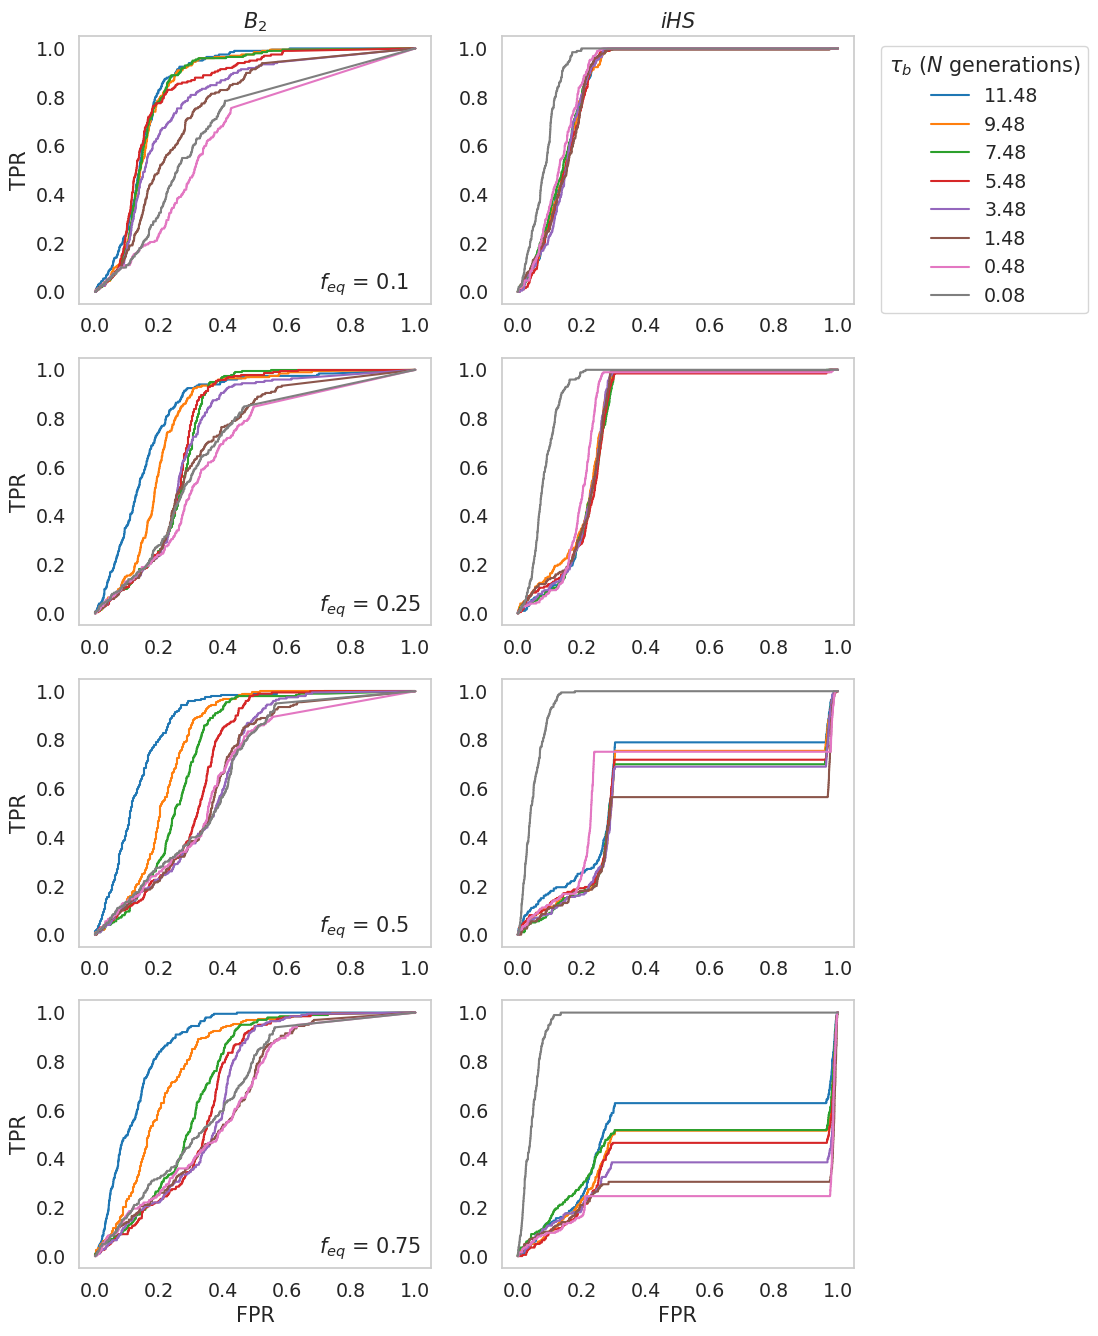

In [74]:
maxRep = 201
winSize = 100

cols = ['tab:blue',
'tab:orange',
'tab:green',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan']

bp_pos = 40342
chr_len = 85005
freqs = [0.1, 0.25, 0.5, 0.75]
sns.set(rc={'figure.figsize':(10,16),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
for p,feq in enumerate(['_0.1', '_0.25', '', '_0.75']):
    sp = (p*2) + 1
    plt.subplot(4,2,sp)
    for c,N in enumerate([277610, 333042, 388474, 443906, 499338, 554770, 582486, 593572]):
        rdf = pd.DataFrame()
        for rep in range(1, maxRep):
            try:
                df = pd.read_csv(r"/home/vivak/balancing_selection/scripts/BM_inputFiles/results/human_ancestor/rep" + str(rep) + "_" + str(N) +feq+".B2", sep='\t', header=0)

                df['bin'] = pd.cut(df.physPos, [x for x in range(1, chr_len+winSize, winSize)],
                                  labels=[x for x in range(1, chr_len, winSize)])
                df['bp'] = np.where(df.physPos == bp_pos, 1, 0)
                df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
                df2 = pd.DataFrame(df.groupby('bin')['CLR'].max())
                df = pd.merge(df1,df2, left_index=True, right_index=True)
                df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
                df['bp'] = np.where(df.bp > 1, 1, df.bp)
                rdf = pd.concat([rdf, df])
            except Exception:
                pass

        y = rdf.bp
        scores = rdf.CLR
        fpr, tpr, thresholds = metrics.roc_curve(y, scores)
        tdf = pd.DataFrame([fpr, tpr]).T
        plt.plot(fpr, tpr, label=str(np.round((595752-N)/27716, 2)) + r"$N$", c=cols[c])
    if(feq=='_0.1'):
        plt.title('$B_2$')
    elif(feq=='_0.75'):
        plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.text(s= "$f_{eq}$" + " = " + str(freqs[p]), x=0.7, y=0.01)

    plt.subplot(4,2,sp+1)
    for c,N in enumerate([277610, 333042, 388474, 443906, 499338, 554770, 582486, 593572]):
        rdf = pd.DataFrame()
        for rep in range(1, maxRep):
            df = pd.read_csv(r'/home/vivak/balancing_selection/scripts/ihs/output/human_ancestor/rep' + str(rep) + '_' + str(N) +feq+'.ihs.out',
                        names=['id','pos', 'freq', 'ihh1','ihh2','ihs'], sep='\t')

            df['bin'] = pd.cut(df.pos, [x for x in range(1, chr_len+winSize, winSize)],
                              labels=[x for x in range(1, chr_len, winSize)])
            df['bp'] = np.where(df.pos == bp_pos, 1, 0)
            df1 = pd.DataFrame(df.groupby('bin')['bp'].sum())
            df2 = pd.DataFrame(df.groupby('bin')['ihs'].max())
            df = pd.merge(df1,df2, left_index=True, right_index=True)
            df['ihs'] = np.where(df.ihs.isna(), 0, df.ihs)
            df['bp'] = np.where(df.bp > 1, 1, df.bp)
            rdf = pd.concat([rdf, df])

        y = rdf.bp
        scores = rdf.ihs
        fpr, tpr, thresholds = metrics.roc_curve(y, scores)
        tdf = pd.DataFrame([fpr, tpr]).T
        plt.plot(fpr, tpr, label=str(np.round((595752-N)/27716, 2)), c=cols[c])
    if(feq=='_0.1'):
        plt.title('$iHS$')
        plt.legend(bbox_to_anchor=(1.05, 1), title=r'$\tau_b$' + ' ($N$ generations)')
    elif(feq=='_0.75'):
        plt.xlabel('FPR')

plt.savefig('/home/vivak/balancing_selection/plots/human_ancestor.tiff', format='tiff', dpi=300, bbox_inches='tight')

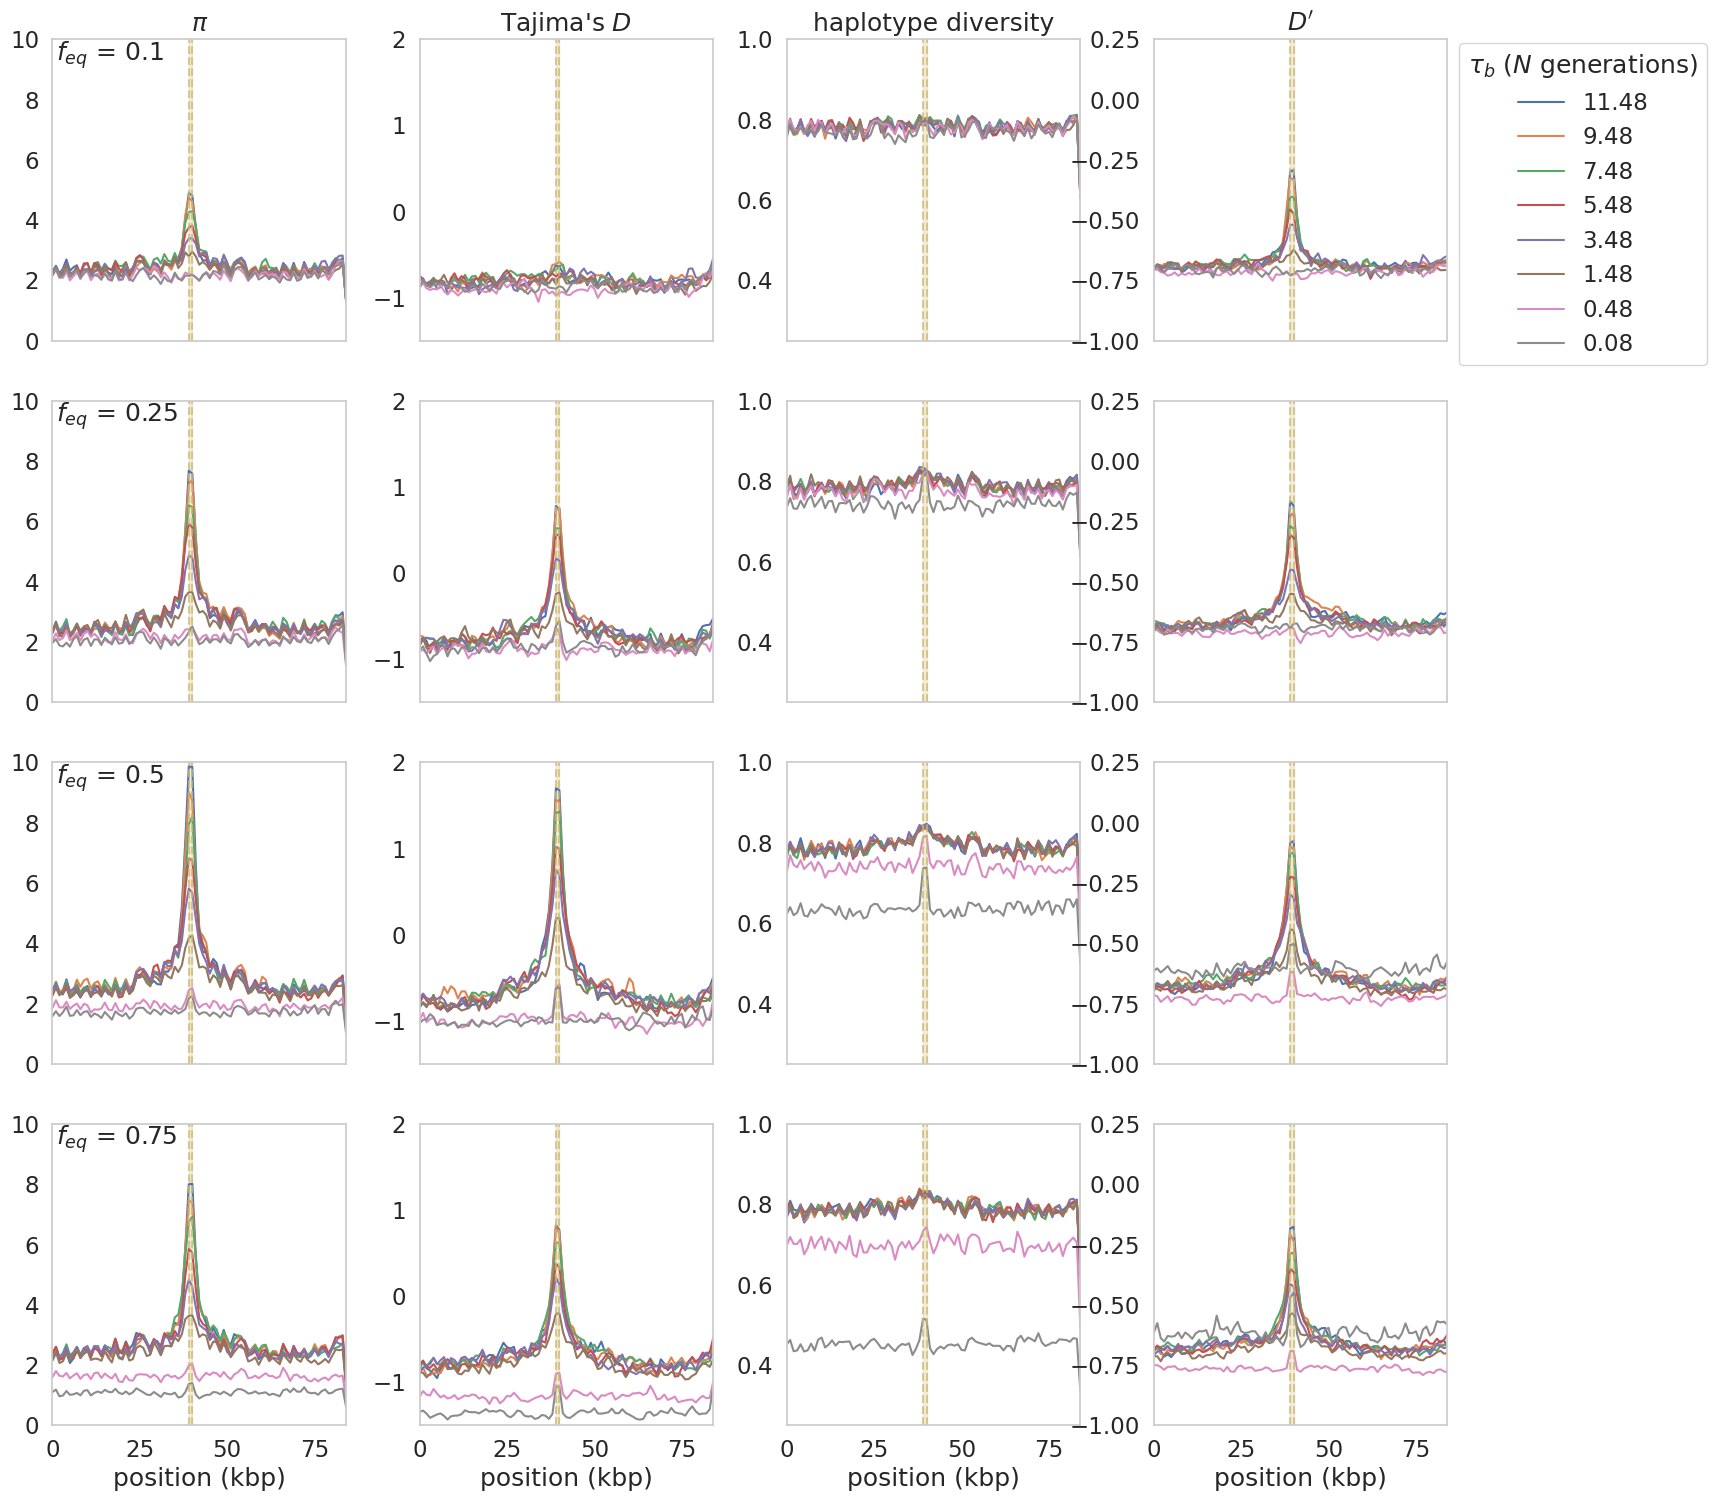

In [67]:
wlim = 84
####PLOT SUMMARY STATS FOR A SINGLE SCENARIO####
ylims = [[0, 10], [-1.5,2], [0.25,1], [-1, 0.25]]
lst = [1,5,9,13]
ylabs = [r'$\pi$', r"Tajima's $D$", r"haplotype diversity", r"$D'$"]
N_list = [277610, 333042, 388474, 443906, 499338, 554770, 582486, 593572]
r_list = [1,5,9,13]
feqs = ['0.1', '0.25','0.5','0.75']
sns.set(rc={'figure.figsize':(18, 18),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.5)

for p, pop in enumerate(['_0.1', '_0.25', '', '_0.75']):
    df_list = []
    for N in N_list:
        df1 = pd.DataFrame()
        for rep in range(1, 201):
            try:
                tdf = pd.read_csv(r"/home/vivak/balancing_selection/summary_stats/human_ancestor/rep" + str(rep) + "_"  + str(N) + pop +
                                  '.stats', sep='\t',header=0)
                df1 = pd.concat([df1, tdf])


            except Exception:
                pass

        l = [tdf.window]
        for stat in ('thetapi', 'tajimasd', 'meanrsq', 'numpoly', 'numsingletons', 'nhaps', 'divergence', 'hapdiv', 'meanDprime'):
            l.append(df1.groupby('window')[stat].mean())

        df1 = pd.DataFrame(l).T
        df1 = df1[df1.window<=wlim] 
        df_list.append(df1)

    for a, stat in enumerate(['thetapi', 'tajimasd', 'hapdiv', 'meanDprime']):
        plt.subplot(4,4,r_list[p]+a)
        for b, df in enumerate(df_list):
            plt.plot(df[stat], label=str(np.round((595752-N_list[b])/27716, 2)))   
        plt.axvline(39, color='y', linestyle='--', alpha=0.75)
        plt.axvline(40, color='y', linestyle='--', alpha=0.75)
        plt.fill_betweenx([-5, 150], [39], [40], alpha=0.25, color='y')
        plt.ylim([ylims[a][0], ylims[a][1]])
        if(r_list[p]+a>=13):
            plt.xlabel('position (kbp)')
        else:
            plt.xticks([])
        if((r_list[p]+a==4) & (pop=='_0.1')):
            plt.legend(bbox_to_anchor=(1, 1.025), title=r'$\tau_b$' + ' ($N$ generations)')
        if(r_list[p]+a<=4):
            plt.title(ylabs[a])
            
        if(stat=='thetapi'):
            plt.text(s=r"$f_{eq}$ = " + feqs[p], x=1, y=9.3)

        plt.margins(x=0)

# #Adjust spacing between subplots
plt.subplots_adjust(wspace=0.25, hspace=0.2)
plt.savefig('/home/vivak/balancing_selection/plots/' + 'human_ancestor_stats.tiff', format='tiff', dpi=300, bbox_inches='tight')
